# Post hoc calibration by Temperature and Platt scaling of the Perch v2 model on BirdSet

In [1]:
from matplotlib import pyplot as plt


plt.style.use("seaborn-v0_8")

In [2]:
from uncertainbird.utils.misc import load_data
from uncertainbird.modules.models.perchv2 import Perchv2Model

log_dir = "/workspace/logs/predictions/perch_v2"
data, predictions, targets, valid_keys = load_data(log_dir, load_logits=True)
model = Perchv2Model()
model_name = 'Perch v2'

/workspace/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/workspace/.venv/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


Loaded data with 12000 samples
Predictions shape: torch.Size([12000, 9736])
Targets shape: torch.Size([12000, 9736])
Loaded data with 539 samples
Predictions shape: torch.Size([539, 9736])
Targets shape: torch.Size([539, 9736])
Loaded data with 24480 samples
Predictions shape: torch.Size([24480, 9736])
Targets shape: torch.Size([24480, 9736])
Loaded data with 15120 samples
Predictions shape: torch.Size([15120, 9736])
Targets shape: torch.Size([15120, 9736])
Loaded data with 4560 samples
Predictions shape: torch.Size([4560, 9736])
Targets shape: torch.Size([4560, 9736])
Loaded data with 23756 samples
Predictions shape: torch.Size([23756, 9736])
Targets shape: torch.Size([23756, 9736])
Loaded data with 205200 samples
Predictions shape: torch.Size([205200, 9736])
Targets shape: torch.Size([205200, 9736])
Loaded data with 36637 samples
Predictions shape: torch.Size([36637, 9736])
Targets shape: torch.Size([36637, 9736])


2025-10-21 12:16:49.549383: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/workspace/.venv/lib/python3.10/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
I0000 00:00:1761049066.842941 1373138 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20783 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:25:00.0, compute capability: 8.9


In [3]:
from uncertainbird.utils.misc import prune_non_target_classes

data = prune_non_target_classes(data, targets)

# Temperature scaling on POW validation set

In [4]:
from uncertainbird.utils.temperature_scaling import (
    fit_global_temperature,
    apply_temperature_scaling,
)
class_index = 10
data_POW = data

# compute global temperature value based on POW
temperature = fit_global_temperature(
    data_POW["POW"]["logits"], data_POW["POW"]["targets"], 1000, lr=0.001
)

print(f"Optimal temperature: {temperature:.3f}")

# apply temperature scaling to all test datasets
for dataset_name in valid_keys:

    data_POW[dataset_name]["predictions_ts"] = apply_temperature_scaling(
        data_POW[dataset_name]["logits"], temperature, model= model
    )

Optimal temperature: 2.191


Dataset: HSN
Before temperature scaling:


/workspace/.venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Average precision score for one or more classes was `nan`. Ignoring these classes in macro-average
  warnings.warn(*args, **kwargs)  # noqa: B028
/workspace/.venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/workspace/.venv/lib/python3.10/site-packages/torchmetrics/functional/classification/calibration_error.py:48: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at /pytorch/aten/src/ATen/native/BucketizationUtils.h:32.)
  indices = torch.buc

Accuracy: tensor(0.9988)
cmAP: tensor(0.5075)
Precision: tensor(0.0267)
Recall: tensor(0.0042)
F1 Score: tensor(0.0068)
AUROC: tensor(0.0454)
ECE: tensor(0.0011)
ECE Weighted: tensor(0.1089)
ECE Top-3: tensor(0.1095)
ECE Top-5: tensor(0.0814)
ECE Top-10: tensor(0.0441)
ECE Top-21: tensor(0.0215)
Miscalibration Score (MCS): tensor(-0.1088)
ECE Under-confidence: tensor(0.1089)
ECE Over-confidence: tensor(5.1377e-05)
After temperature scaling:
Accuracy: tensor(0.9989)
cmAP: tensor(0.5146)
Precision: tensor(0.0295)
Recall: tensor(0.0079)
F1 Score: tensor(0.0111)
AUROC: tensor(0.0445)
ECE: tensor(0.0024)
ECE Weighted: tensor(0.0769)
ECE Top-3: tensor(0.0674)
ECE Top-5: tensor(0.0536)
ECE Top-10: tensor(0.0515)
ECE Top-21: tensor(0.0454)
Miscalibration Score (MCS): tensor(-0.0633)
ECE Under-confidence: tensor(0.0701)
ECE Over-confidence: tensor(0.0068)
Dataset: NBP
Before temperature scaling:
Accuracy: tensor(0.9966)
cmAP: tensor(0.6564)
Precision: tensor(0.1035)
Recall: tensor(0.0230)
F1 Sc

Accuracy: tensor(0.9942)
cmAP: tensor(0.2274)
Precision: tensor(0.0985)
Recall: tensor(0.0039)
F1 Score: tensor(0.0072)
AUROC: tensor(0.2470)
ECE: tensor(0.0054)
ECE Weighted: tensor(0.1098)
ECE Top-3: tensor(0.2151)
ECE Top-5: tensor(0.1702)
ECE Top-10: tensor(0.1133)
ECE Top-21: tensor(0.0754)
Miscalibration Score (MCS): tensor(-0.1093)
ECE Under-confidence: tensor(0.1095)
ECE Over-confidence: tensor(0.0002)
After temperature scaling:
Accuracy: tensor(0.9941)
cmAP: tensor(0.2275)
Precision: tensor(0.0049)
Recall: tensor(6.8505e-06)
F1 Score: tensor(1.3682e-05)
AUROC: tensor(0.2473)
ECE: tensor(0.0051)
ECE Weighted: tensor(0.1048)
ECE Top-3: tensor(0.2099)
ECE Top-5: tensor(0.1649)
ECE Top-10: tensor(0.1072)
ECE Top-21: tensor(0.0693)
Miscalibration Score (MCS): tensor(-0.1043)
ECE Under-confidence: tensor(0.1045)
ECE Over-confidence: tensor(0.0002)
Dataset: POW
Before temperature scaling:
Accuracy: tensor(0.9943)
cmAP: tensor(0.5174)
Precision: tensor(0.0720)
Recall: tensor(0.0107)
F

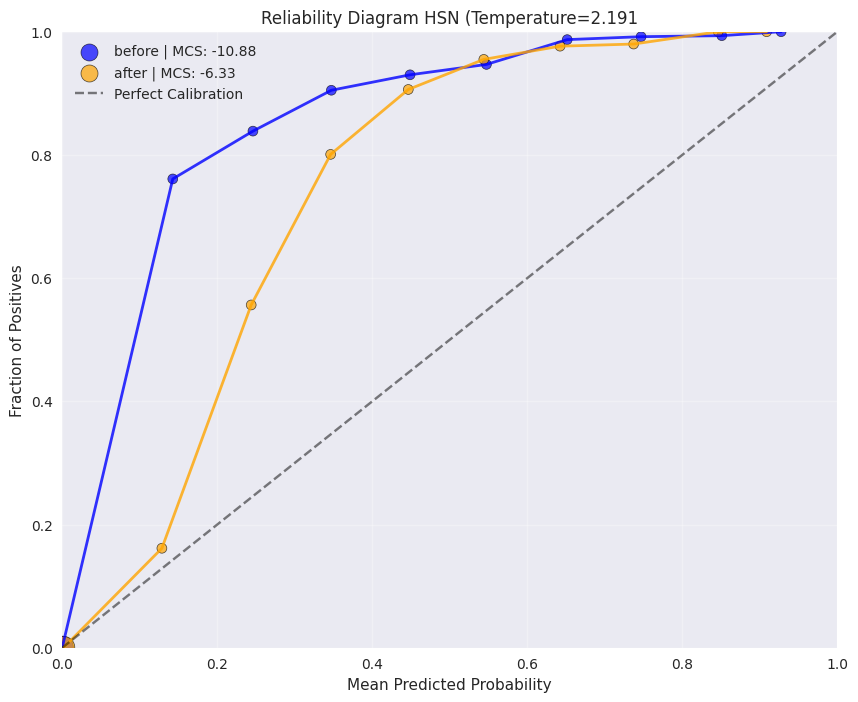

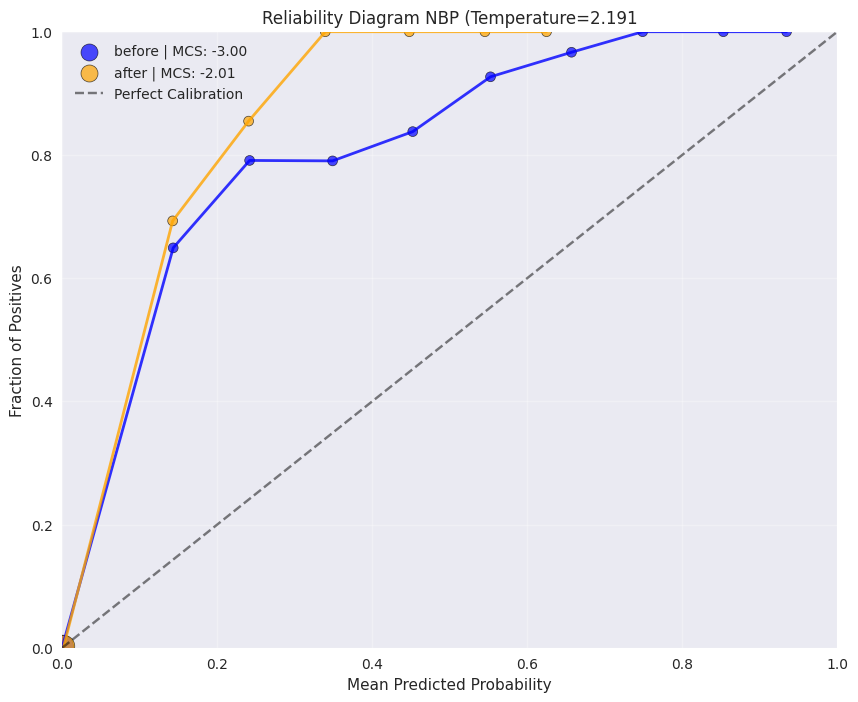

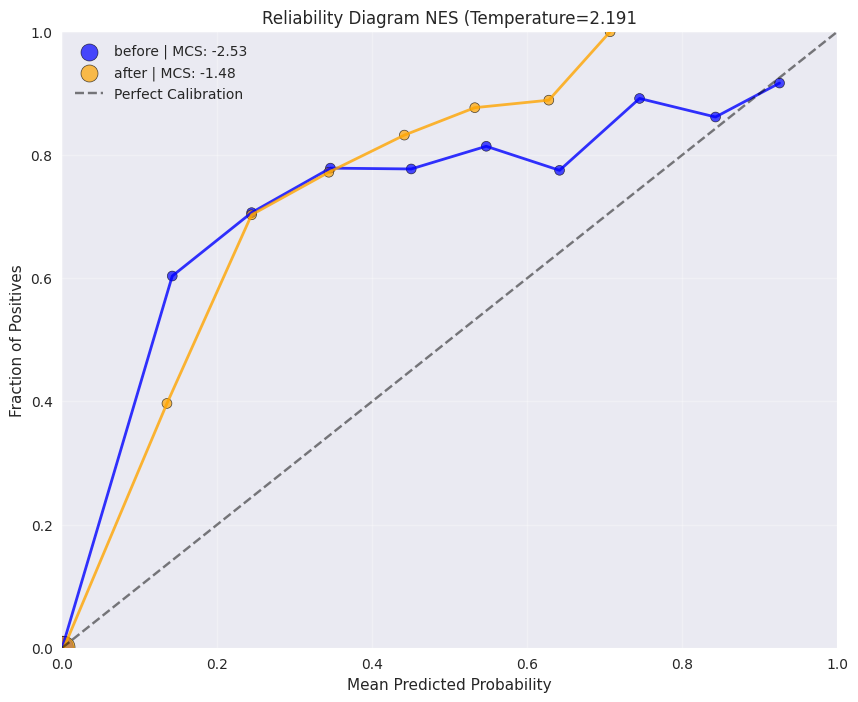

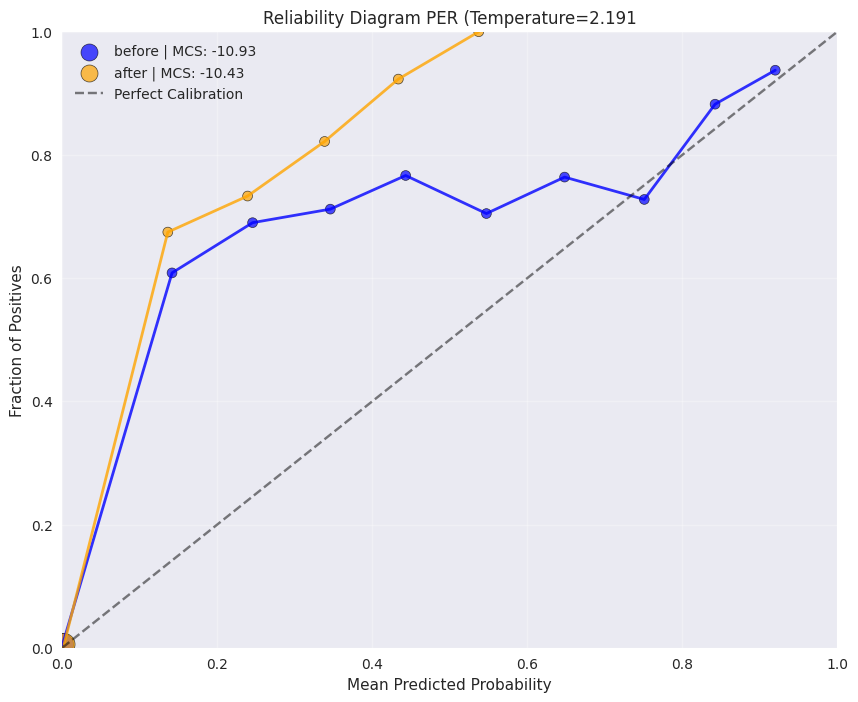

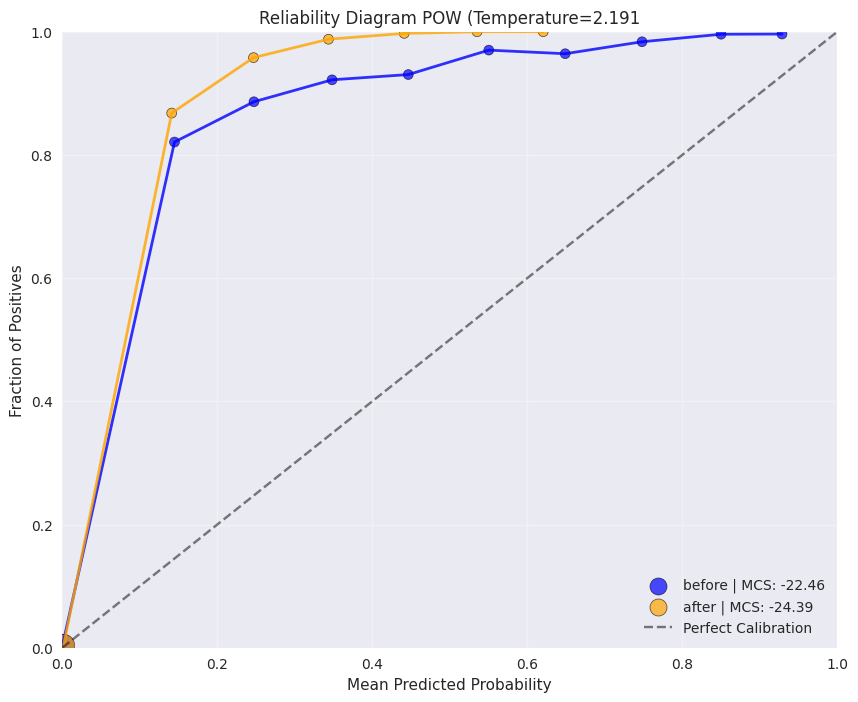

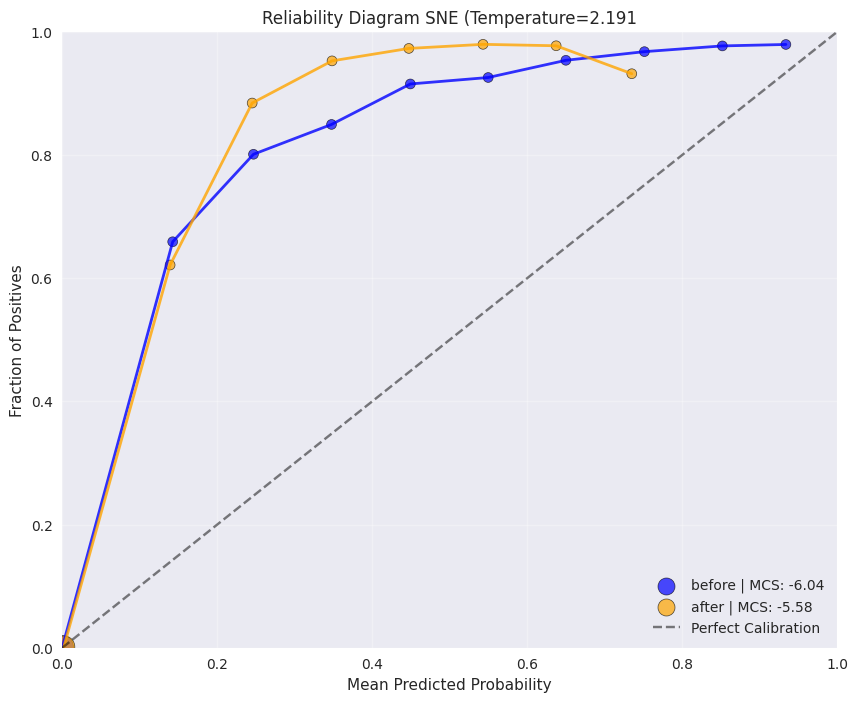

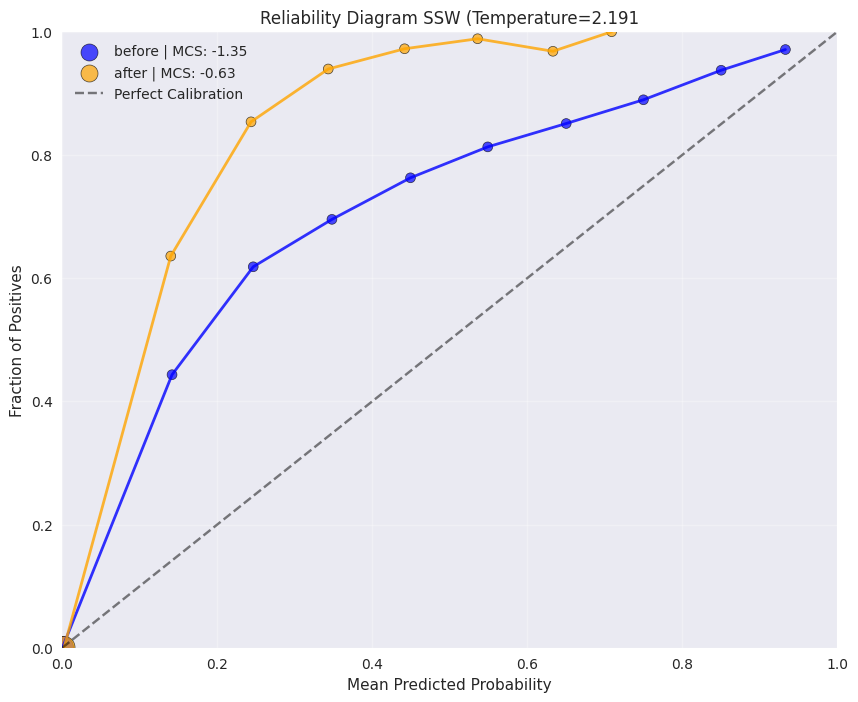

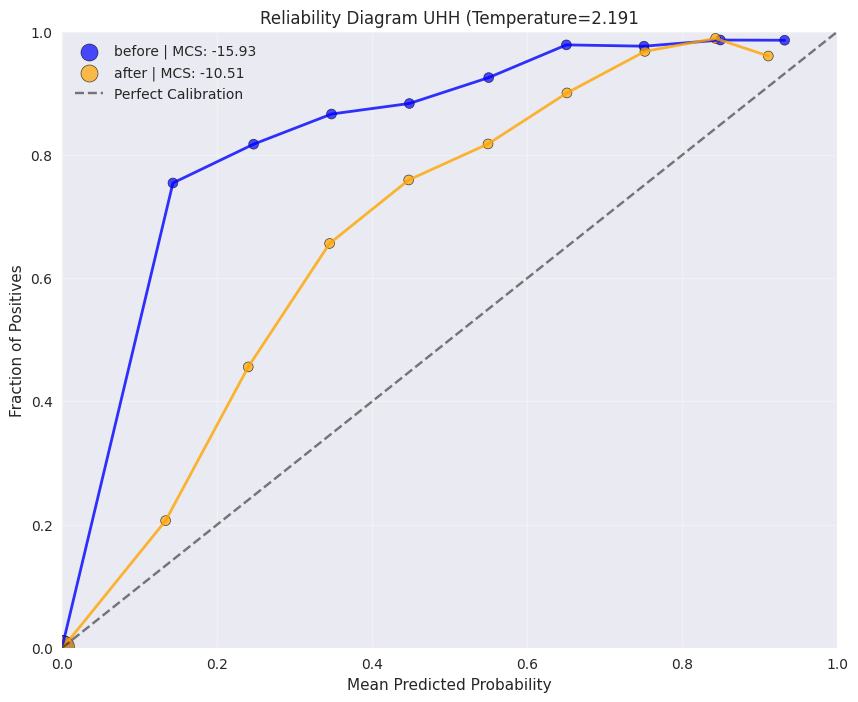

In [5]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
    print_metrics,
)


for dataset_name in valid_keys:
    print("Dataset:", dataset_name)
    print("Before temperature scaling:")
    data_POW[dataset_name]["metrics"] = print_metrics(
        data_POW[dataset_name]["predictions"], data_POW[dataset_name]["targets"]
    )
    print("After temperature scaling:")
    data_POW[dataset_name]["metrics_ts"] = print_metrics(
        data_POW[dataset_name]["predictions_ts"], data_POW[dataset_name]["targets"]
    )
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data_POW[dataset_name]["predictions"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "blue",
            "metrics": data_POW[dataset_name]["metrics"],
        },
        "after": {
            "predictions": data_POW[dataset_name]["predictions_ts"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "orange",
            "metrics": data_POW[dataset_name]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram {dataset_name} (Temperature={temperature:.3f}",
    )

# Platt scaling on POW validation set

In [6]:
from uncertainbird.utils.temperature_scaling import (
    fit_global_platt_scaling,
    apply_platt_scaling
)
class_index = 10
data_POW = data

# compute global temperature value based on POW
slope, bias = fit_global_platt_scaling(
    data_POW["POW"]["logits"], data_POW["POW"]["targets"], 1000, lr=0.01
)

print(f"Optimal slope: {slope:.3f}, bias: {bias:.3f}")

# apply temperature scaling to all test datasets
for dataset_name in valid_keys:

    data_POW[dataset_name]["predictions_ts"] = apply_platt_scaling(
        data_POW[dataset_name]["logits"], slope, bias, model= model
    )

Optimal slope: 0.315, bias: -3.970


Dataset: HSN
Before platt scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.5075)
Precision: tensor(0.0267)
Recall: tensor(0.0042)
F1 Score: tensor(0.0068)
AUROC: tensor(0.0454)
ECE: tensor(0.0011)
ECE Weighted: tensor(0.1089)
ECE Top-3: tensor(0.1095)
ECE Top-5: tensor(0.0814)
ECE Top-10: tensor(0.0441)
ECE Top-21: tensor(0.0215)
Miscalibration Score (MCS): tensor(-0.1088)
ECE Under-confidence: tensor(0.1089)
ECE Over-confidence: tensor(5.1377e-05)
After temperature scaling:
Accuracy: tensor(0.9987)
cmAP: tensor(0.5323)
Precision: tensor(0.0049)
Recall: tensor(0.0001)
F1 Score: tensor(0.0002)
AUROC: tensor(0.0455)
ECE: tensor(0.0027)
ECE Weighted: tensor(0.0930)
ECE Top-3: tensor(0.0841)
ECE Top-5: tensor(0.0625)
ECE Top-10: tensor(0.0515)
ECE Top-21: tensor(0.0416)
Miscalibration Score (MCS): tensor(-0.0829)
ECE Under-confidence: tensor(0.0879)
ECE Over-confidence: tensor(0.0051)
Dataset: NBP
Before platt scaling:
Accuracy: tensor(0.9966)
cmAP: tensor(0.6564)
Precision: tensor(0.1035)

Accuracy: tensor(0.9978)
cmAP: tensor(0.3315)
Precision: tensor(0.0620)
Recall: tensor(0.0113)
F1 Score: tensor(0.0156)
AUROC: tensor(0.1190)
ECE: tensor(0.0020)
ECE Weighted: tensor(0.0604)
ECE Top-3: tensor(0.0999)
ECE Top-5: tensor(0.0762)
ECE Top-10: tensor(0.0619)
ECE Top-21: tensor(0.0370)
Miscalibration Score (MCS): tensor(-0.0604)
ECE Under-confidence: tensor(0.0604)
ECE Over-confidence: tensor(2.1364e-05)
After temperature scaling:
Accuracy: tensor(0.9973)
cmAP: tensor(0.3336)
Precision: tensor(0.)
Recall: tensor(0.)
F1 Score: tensor(0.)
AUROC: tensor(0.1191)
ECE: tensor(0.0033)
ECE Weighted: tensor(0.0672)
ECE Top-3: tensor(0.1166)
ECE Top-5: tensor(0.0935)
ECE Top-10: tensor(0.0656)
ECE Top-21: tensor(0.0377)
Miscalibration Score (MCS): tensor(-0.0645)
ECE Under-confidence: tensor(0.0658)
ECE Over-confidence: tensor(0.0013)
Dataset: SSW
Before platt scaling:
Accuracy: tensor(0.9992)
cmAP: tensor(0.4525)
Precision: tensor(0.1339)
Recall: tensor(0.0420)
F1 Score: tensor(0.0553

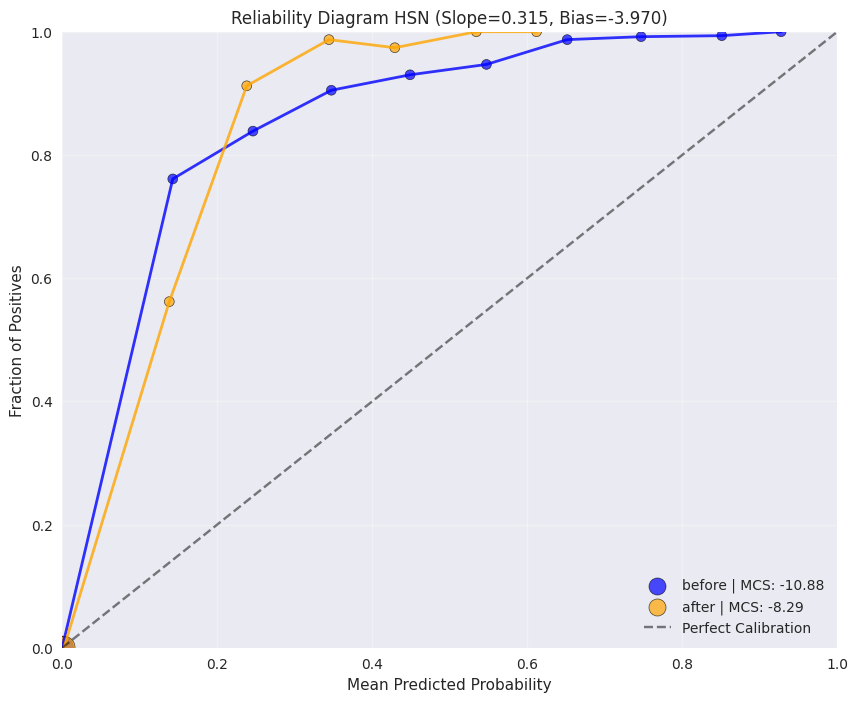

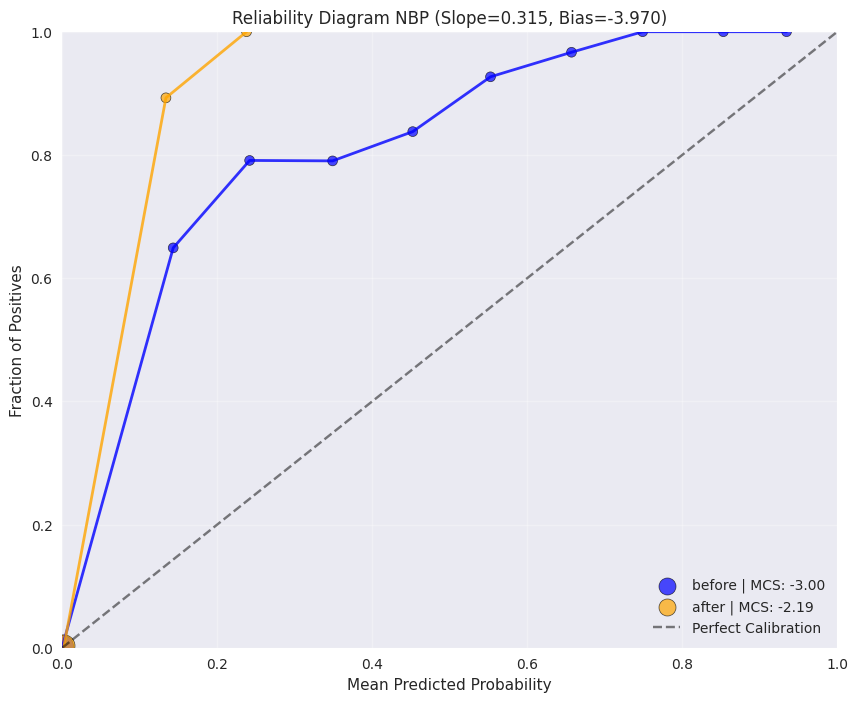

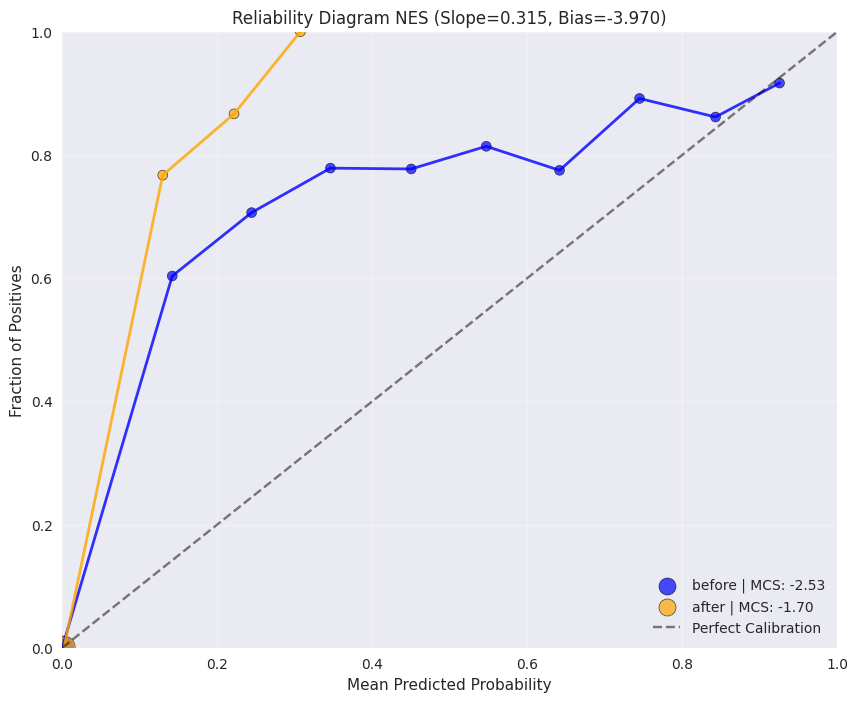

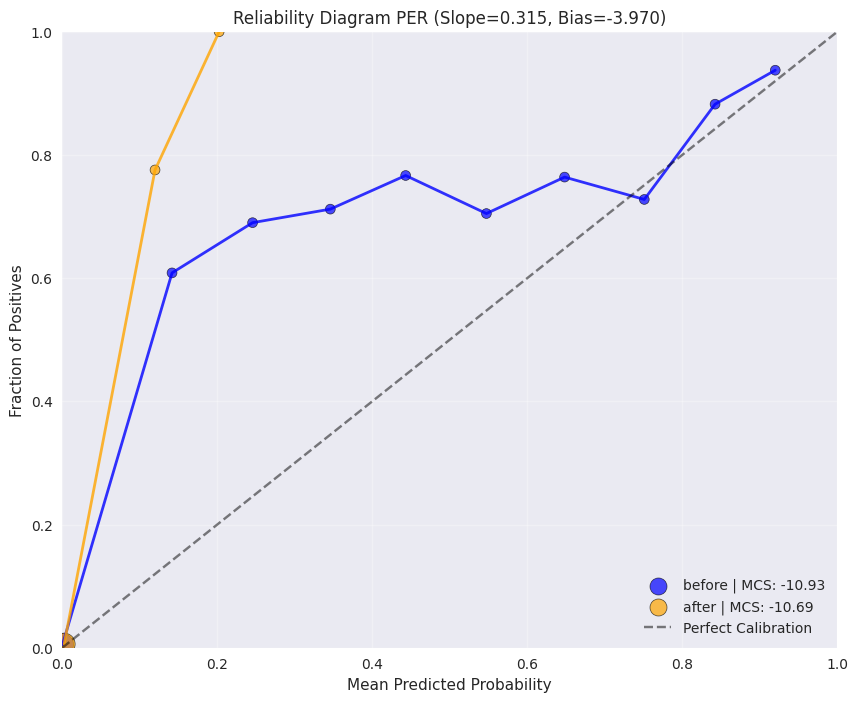

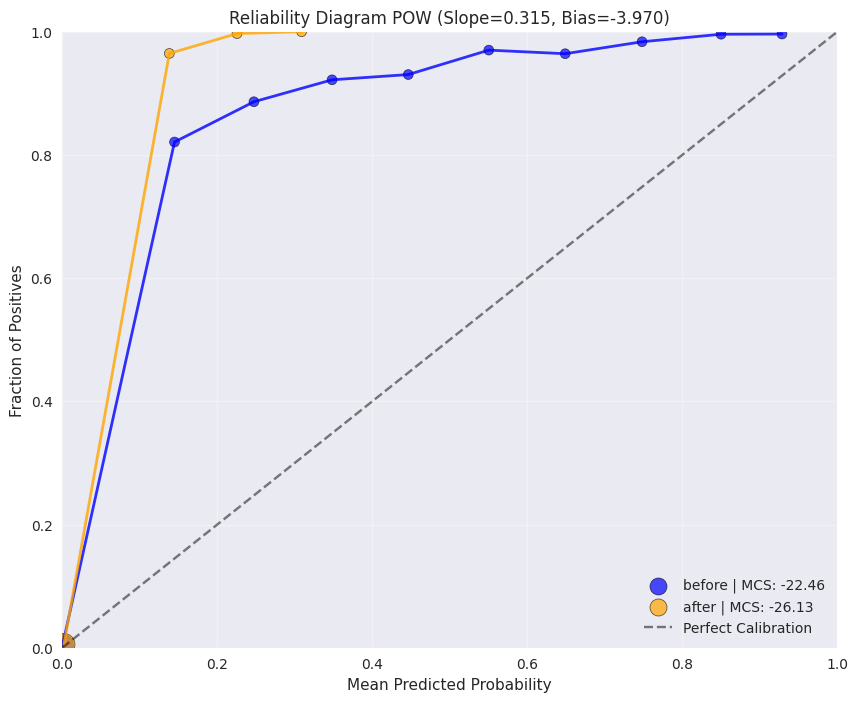

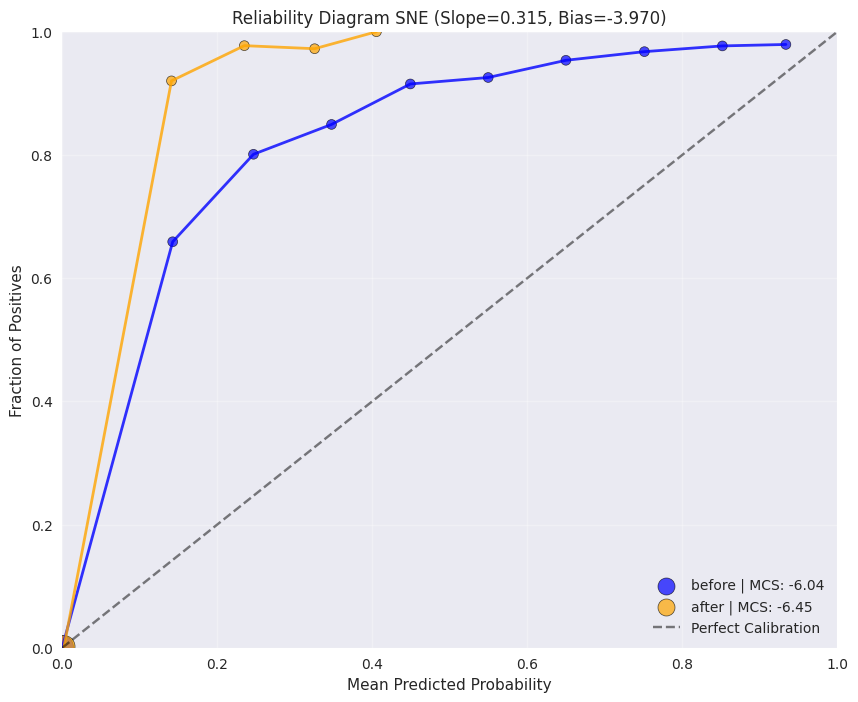

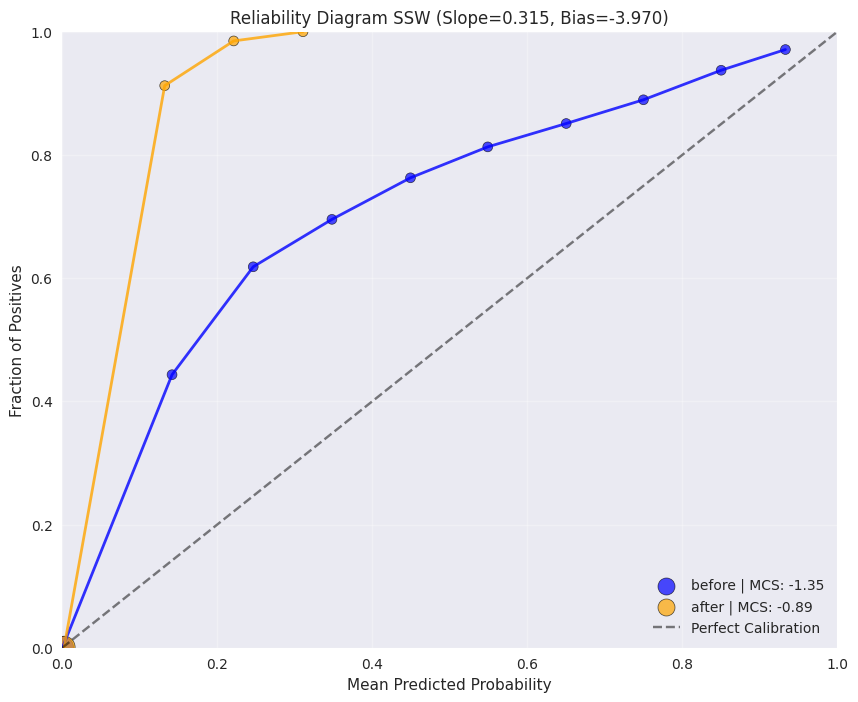

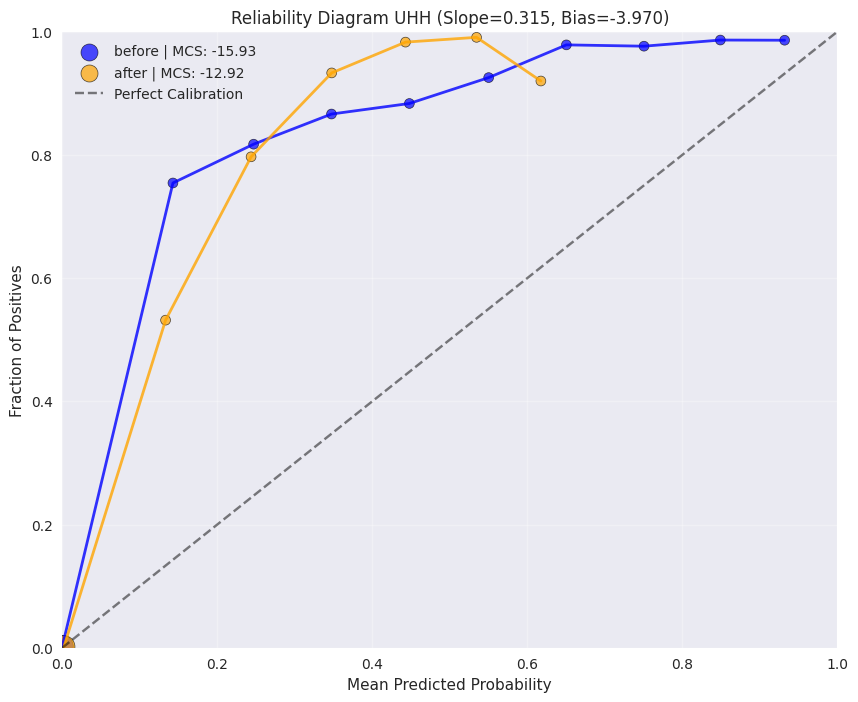

In [7]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
    print_metrics,
)


for dataset_name in valid_keys:
    print("Dataset:", dataset_name)
    print("Before platt scaling:")
    data_POW[dataset_name]["metrics"] = print_metrics(
        data_POW[dataset_name]["predictions"], data_POW[dataset_name]["targets"]
    )
    print("After temperature scaling:")
    data_POW[dataset_name]["metrics_ts"] = print_metrics(
        data_POW[dataset_name]["predictions_ts"], data_POW[dataset_name]["targets"]
    )
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data_POW[dataset_name]["predictions"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "blue",
            "metrics": data_POW[dataset_name]["metrics"],
        },
        "after": {
            "predictions": data_POW[dataset_name]["predictions_ts"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "orange",
            "metrics": data_POW[dataset_name]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram {dataset_name} (Slope={slope:.3f}, Bias={bias:.3f})",
    )

# Platt scaling using a porton of the test data

In [8]:
from uncertainbird.utils.misc import slit_based_on_first_n_samples

# 10min of audio per class -> 120 samples of 5s each
data_120 = slit_based_on_first_n_samples(data, n=120)

## Global parameters for all classes

### Temperature scaling

In [9]:
for ds in valid_keys:

    # compute global temperature value based on POW
    temperature = fit_global_temperature(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )

    print(f"Optimal temperature: {temperature:.3f} for {ds}")

    data_120[ds+'_test']["predictions_ts"] = apply_temperature_scaling(
        data_120[ds+'_test']["logits"], temperature, model= model
    )
    print('Before temperature scaling:')
    data_120[ds+'_test']["metrics"] = print_metrics(
        data_120[ds+'_test']["predictions"], data_120[ds+'_test']["targets"]
    )
    print('After temperature scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Optimal temperature: 2.112 for HSN
Before temperature scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.5073)
Precision: tensor(0.0267)
Recall: tensor(0.0042)
F1 Score: tensor(0.0068)
AUROC: tensor(0.0454)
ECE: tensor(0.0011)
ECE Weighted: tensor(0.1090)
ECE Top-3: tensor(0.1097)
ECE Top-5: tensor(0.0814)
ECE Top-10: tensor(0.0441)
ECE Top-21: tensor(0.0215)
Miscalibration Score (MCS): tensor(-0.1089)
ECE Under-confidence: tensor(0.1090)
ECE Over-confidence: tensor(5.1814e-05)
After temperature scaling:
Accuracy: tensor(0.9989)
cmAP: tensor(0.5134)
Precision: tensor(0.0297)
Recall: tensor(0.0102)
F1 Score: tensor(0.0131)
AUROC: tensor(0.0444)
ECE: tensor(0.0024)
ECE Weighted: tensor(0.0754)
ECE Top-3: tensor(0.0662)
ECE Top-5: tensor(0.0529)
ECE Top-10: tensor(0.0512)
ECE Top-21: tensor(0.0453)
Miscalibration Score (MCS): tensor(-0.0618)
ECE Under-confidence: tensor(0.0686)
ECE Over-confidence: tensor(0.0068)
Optimal temperature: 3.223 for NBP
Before temperature scaling:
Accuracy: tenso

Accuracy: tensor(0.9943)
cmAP: tensor(0.5189)
Precision: tensor(0.0720)
Recall: tensor(0.0108)
F1 Score: tensor(0.0159)
AUROC: tensor(0.1053)
ECE: tensor(0.0053)
ECE Weighted: tensor(0.2246)
ECE Top-3: tensor(0.2869)
ECE Top-5: tensor(0.2418)
ECE Top-10: tensor(0.1705)
ECE Top-21: tensor(0.0991)
Miscalibration Score (MCS): tensor(-0.2246)
ECE Under-confidence: tensor(0.2246)
ECE Over-confidence: tensor(7.3838e-06)
After temperature scaling:
Accuracy: tensor(0.9931)
cmAP: tensor(0.5454)
Precision: tensor(0.)
Recall: tensor(0.)
F1 Score: tensor(0.)
AUROC: tensor(0.1064)
ECE: tensor(0.0063)
ECE Weighted: tensor(0.2639)
ECE Top-3: tensor(0.3604)
ECE Top-5: tensor(0.2915)
ECE Top-10: tensor(0.1939)
ECE Top-21: tensor(0.1045)
Miscalibration Score (MCS): tensor(-0.2631)
ECE Under-confidence: tensor(0.2635)
ECE Over-confidence: tensor(0.0004)
Optimal temperature: 3.073 for SNE
Before temperature scaling:
Accuracy: tensor(0.9978)
cmAP: tensor(0.3318)
Precision: tensor(0.0620)
Recall: tensor(0.0

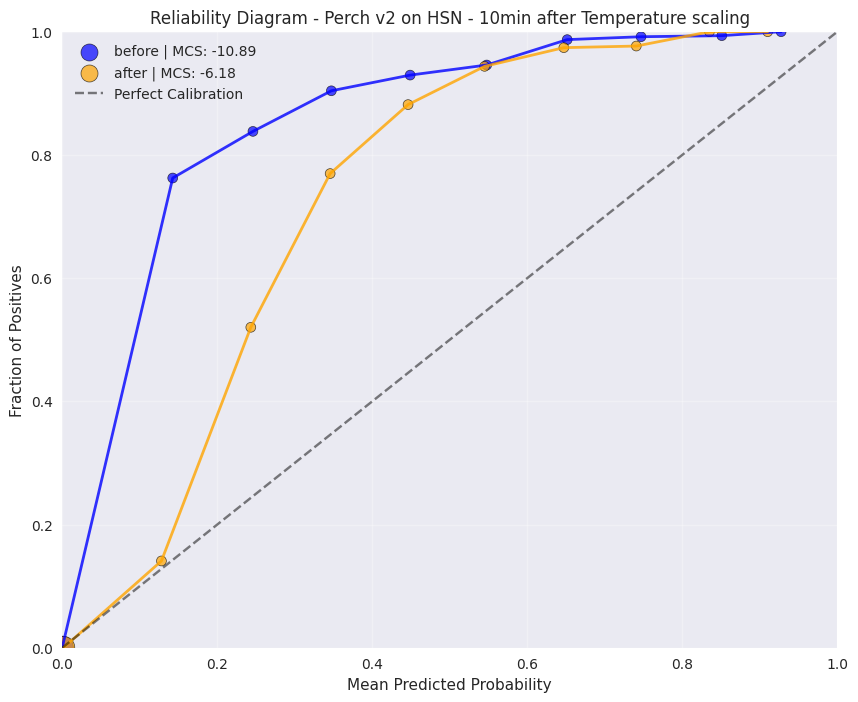

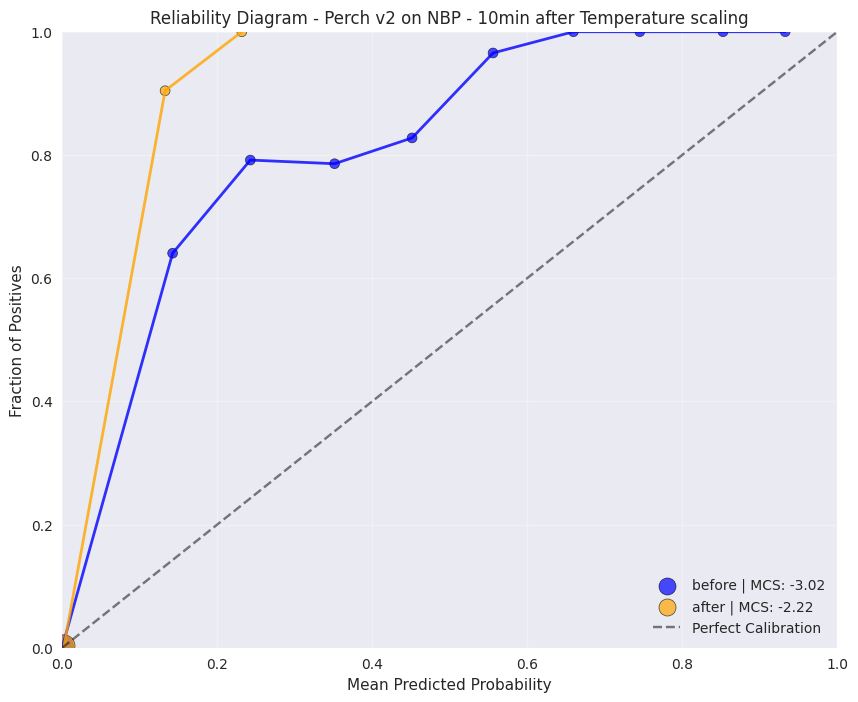

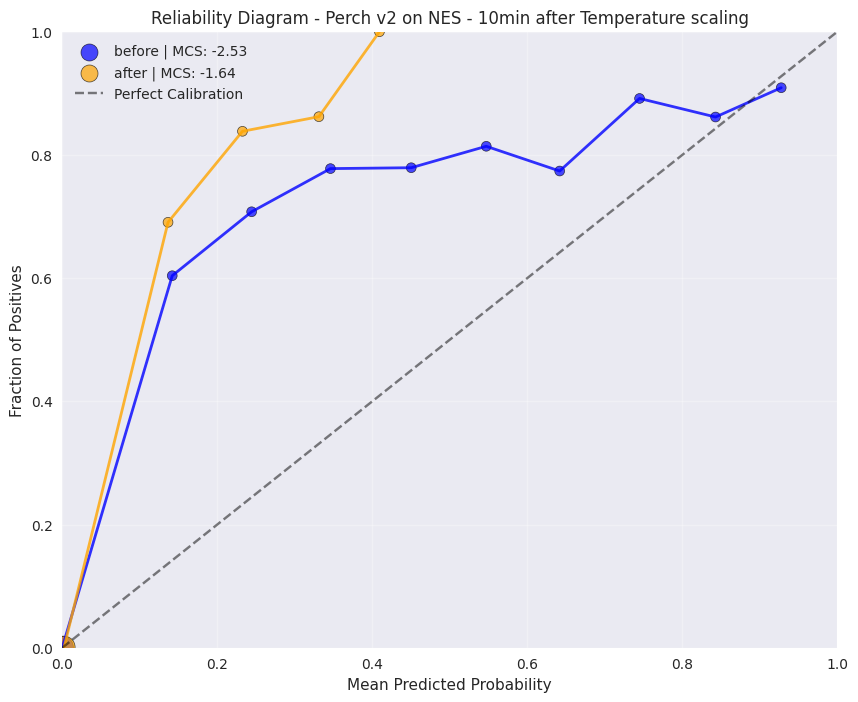

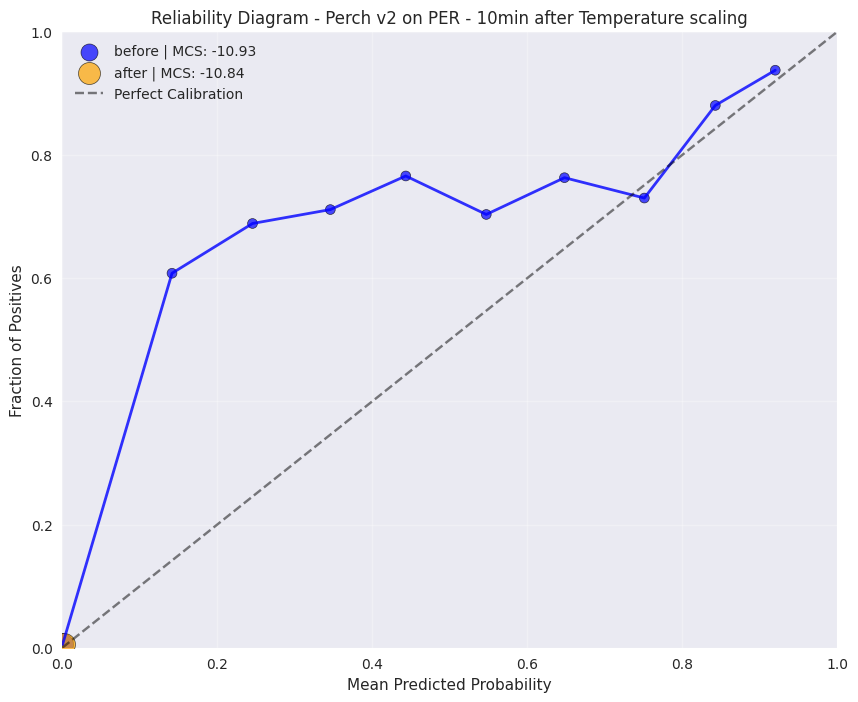

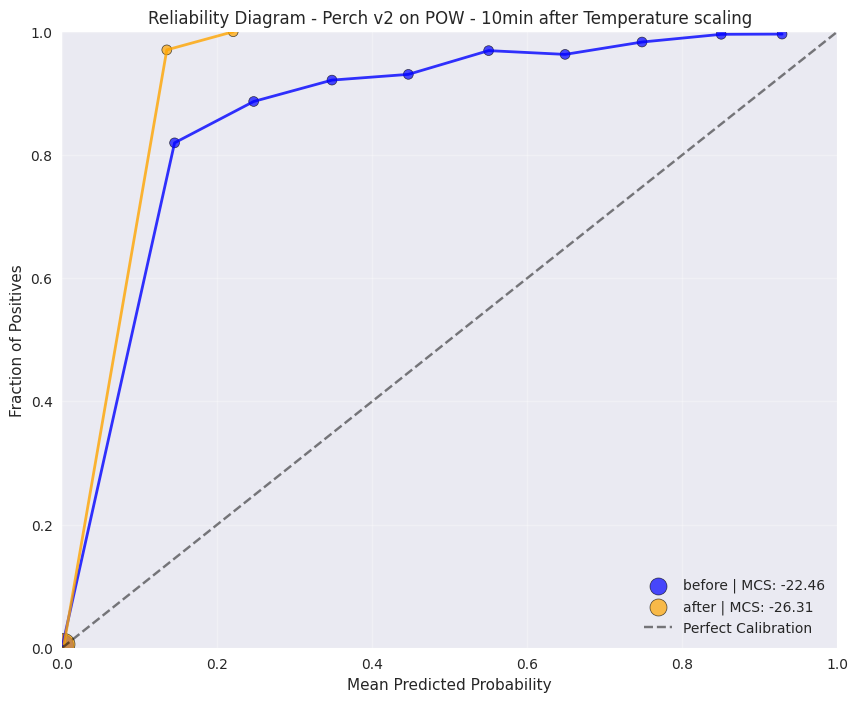

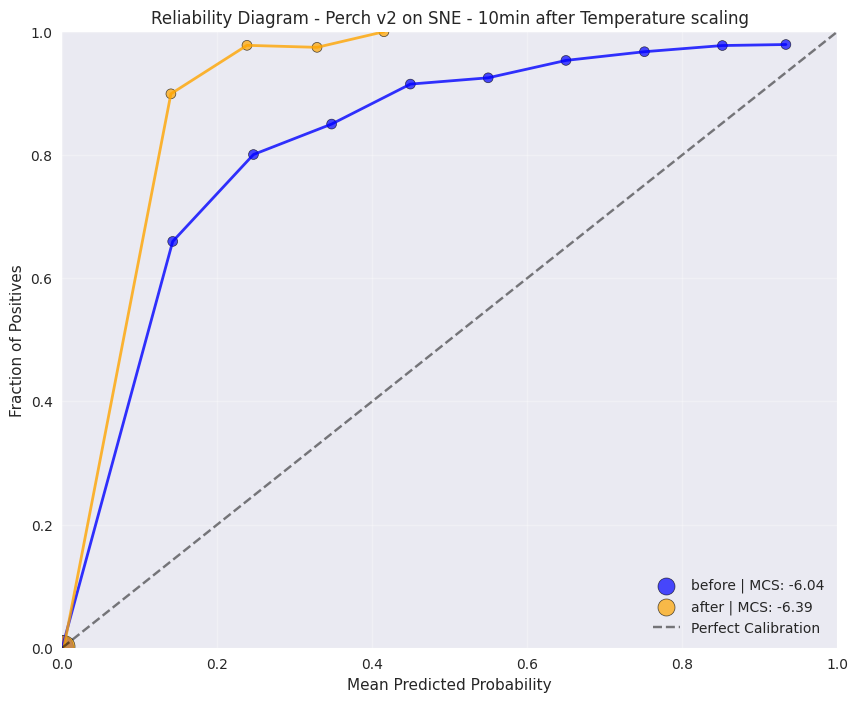

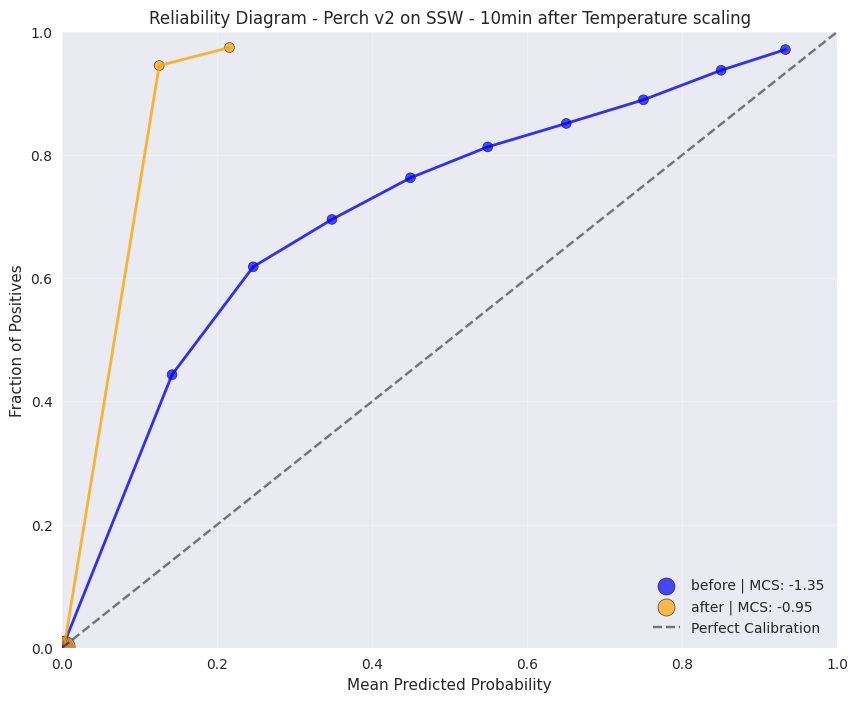

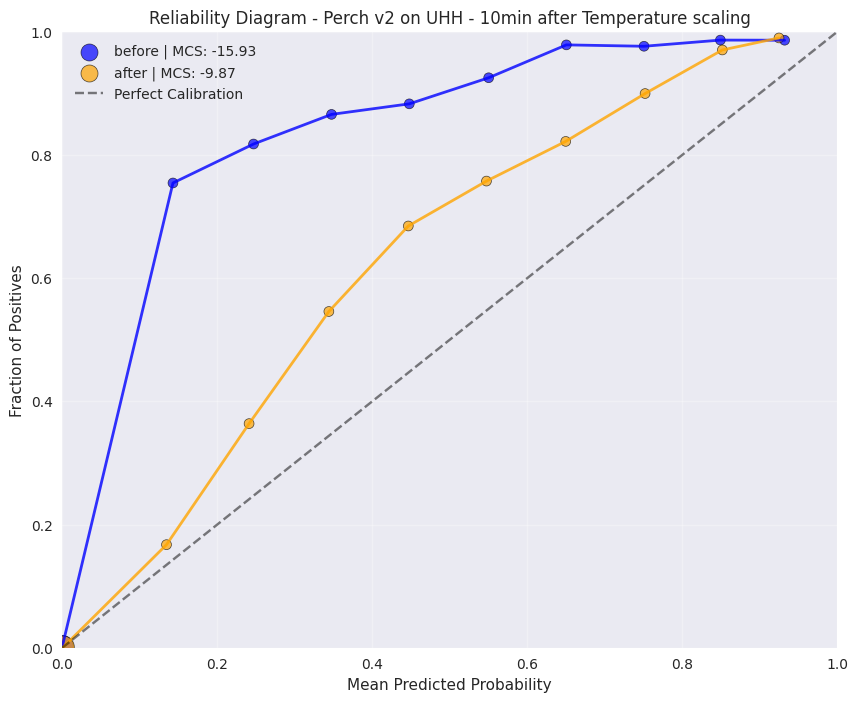

In [10]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after Temperature scaling",
    )

### Platt scaling

In [11]:
from uncertainbird.utils.temperature_scaling import fit_per_class_platt_scaling


for ds in valid_keys:

    # compute global temperature value based on POW
    slopes, biases = fit_per_class_platt_scaling(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )

    print(f"Optimal slopes: {slopes}, biases: {biases} for {ds}")

    data_120[ds+'_test']["predictions_ts"] = apply_platt_scaling(
        data_120[ds+'_test']["logits"], slopes, biases, model= model
    )
    print('Before platt scaling:')
    data_120[ds+'_test']["metrics"] = print_metrics(
        data_120[ds+'_test']["predictions"], data_120[ds+'_test']["targets"]
    )
    print('After platt scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Optimal slopes: tensor([ 1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465, -0.8799,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465, -1.0780,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465

Accuracy: tensor(0.9988)
cmAP: tensor(0.5073)
Precision: tensor(0.0267)
Recall: tensor(0.0042)
F1 Score: tensor(0.0068)
AUROC: tensor(0.0454)
ECE: tensor(0.0011)
ECE Weighted: tensor(0.1090)
ECE Top-3: tensor(0.1097)
ECE Top-5: tensor(0.0814)
ECE Top-10: tensor(0.0441)
ECE Top-21: tensor(0.0215)
Miscalibration Score (MCS): tensor(-0.1089)
ECE Under-confidence: tensor(0.1090)
ECE Over-confidence: tensor(5.1814e-05)
After platt scaling:
Accuracy: tensor(0.9992)
cmAP: tensor(0.1708)
Precision: tensor(0.0080)
Recall: tensor(0.0057)
F1 Score: tensor(0.0066)
AUROC: tensor(0.0178)
ECE: tensor(0.0013)
ECE Weighted: tensor(0.0535)
ECE Top-3: tensor(0.0534)
ECE Top-5: tensor(0.0489)
ECE Top-10: tensor(0.0379)
ECE Top-21: tensor(0.0261)
Miscalibration Score (MCS): tensor(0.0424)
ECE Under-confidence: tensor(0.0055)
ECE Over-confidence: tensor(0.0480)
Optimal slopes: tensor([ 1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,

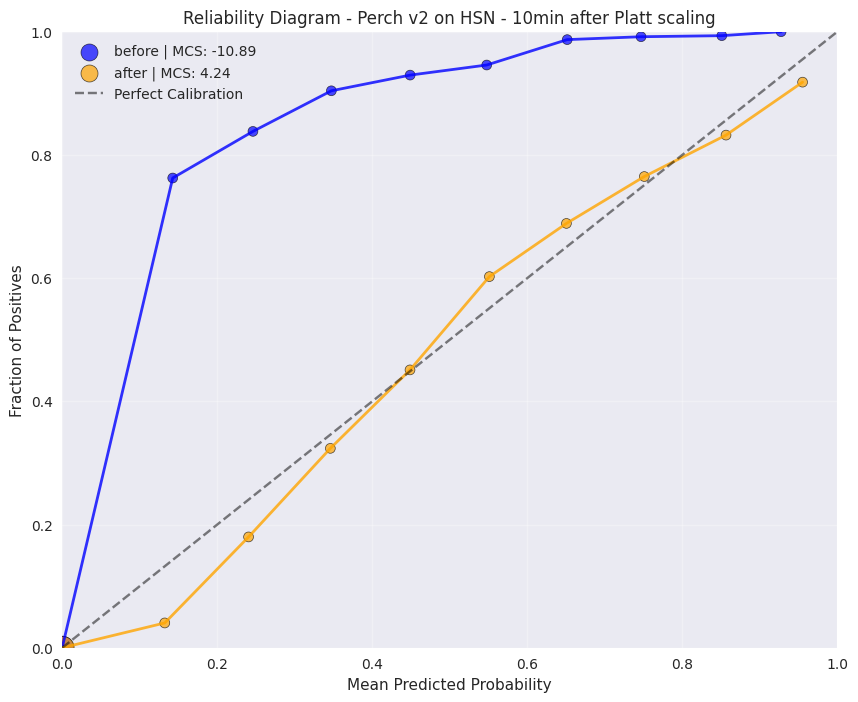

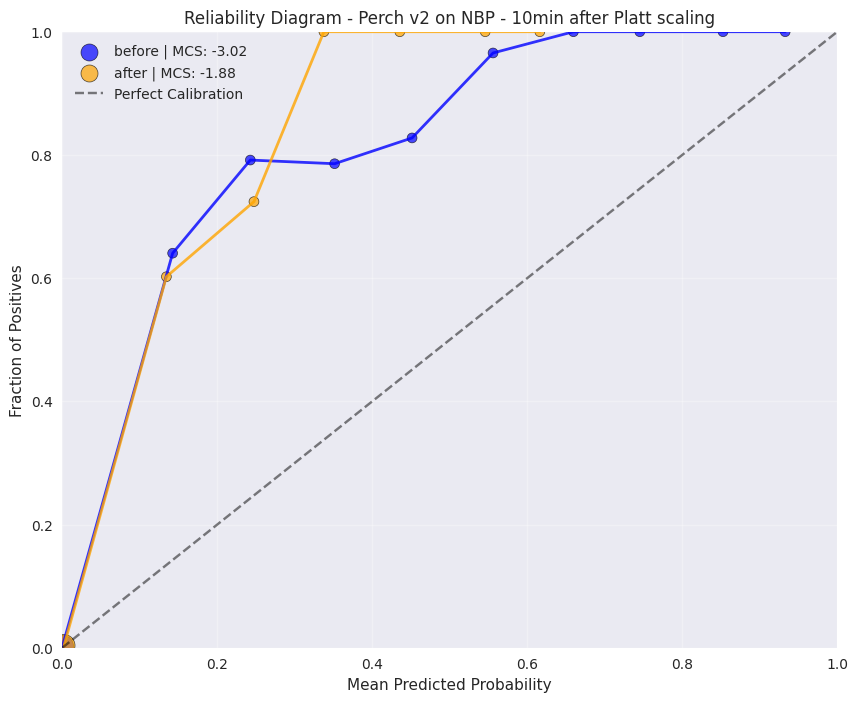

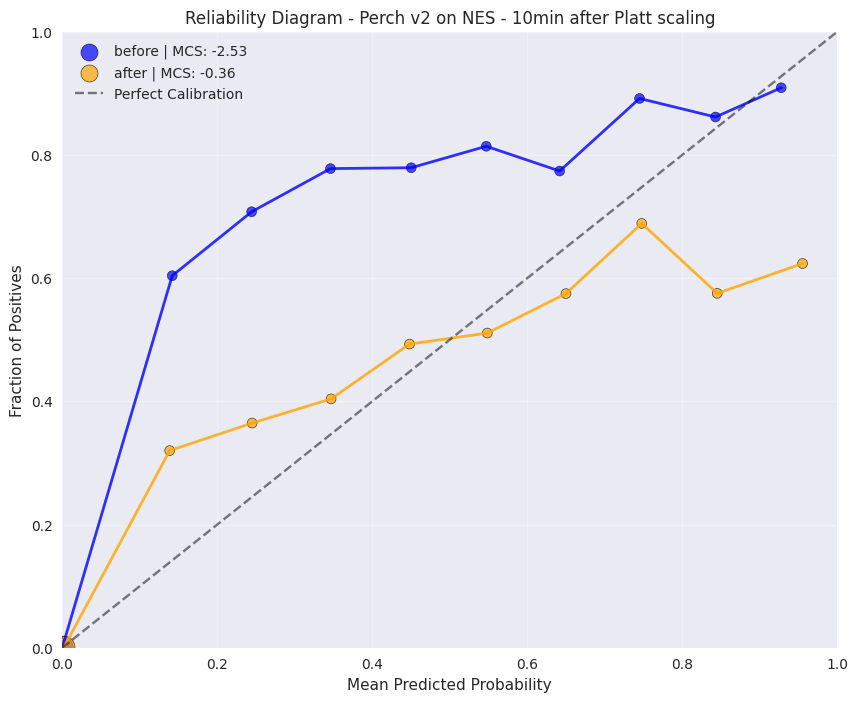

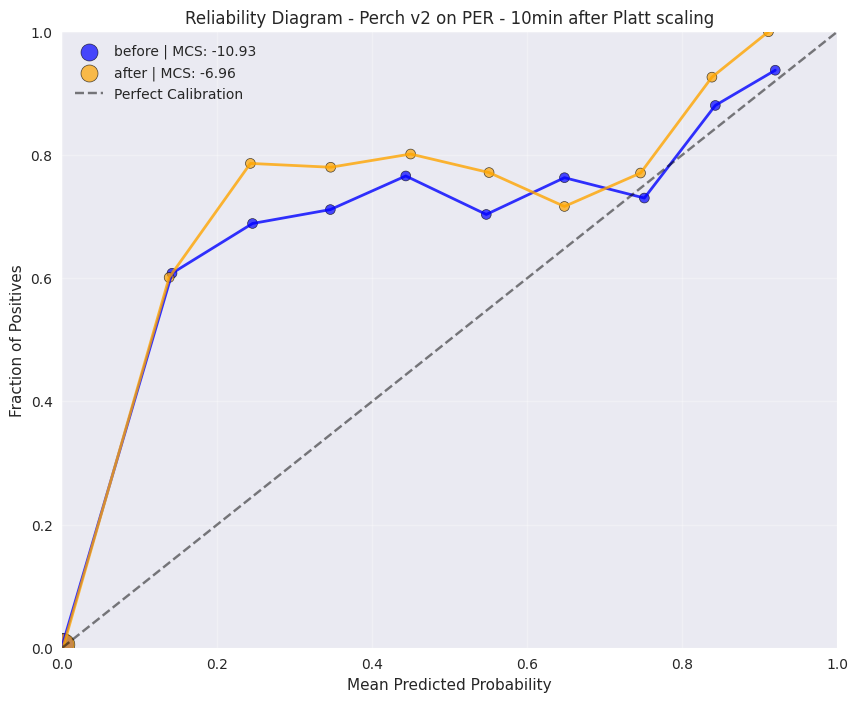

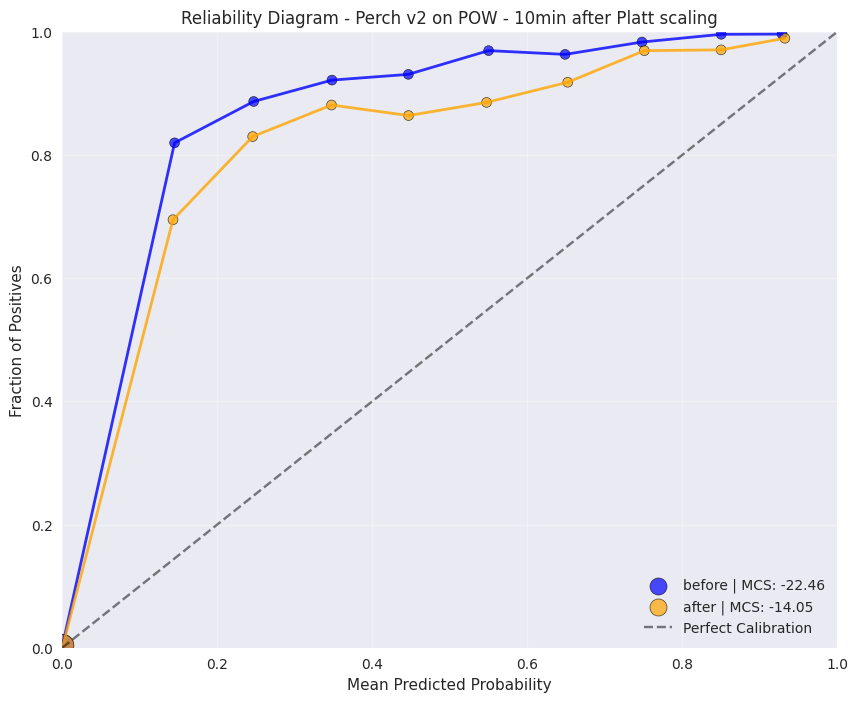

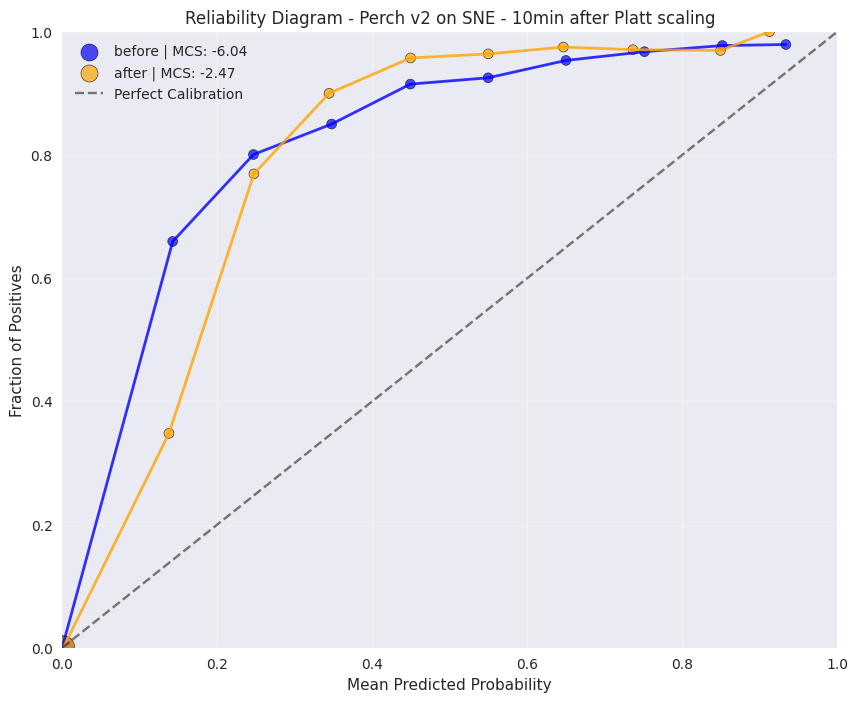

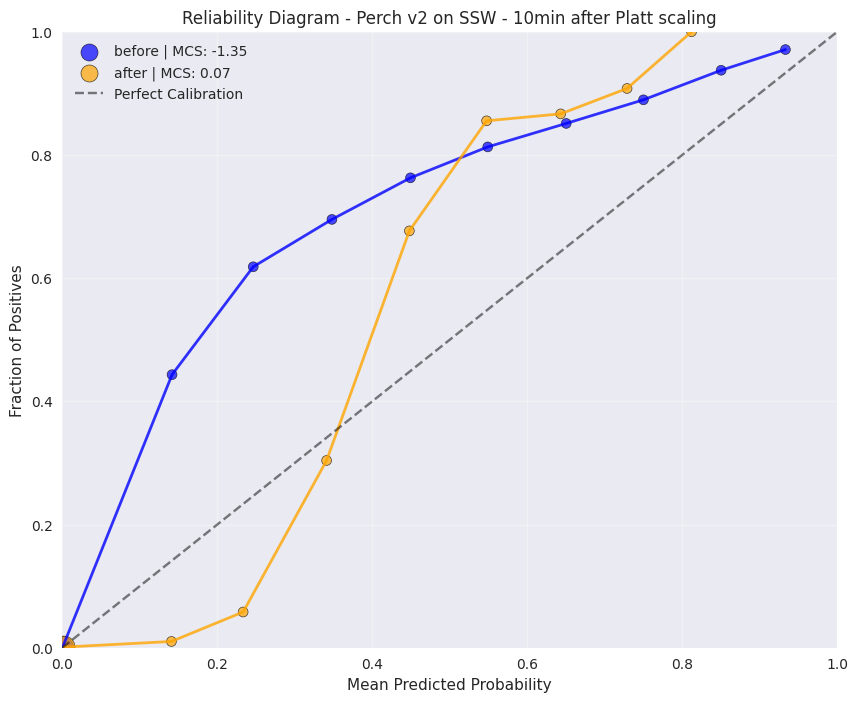

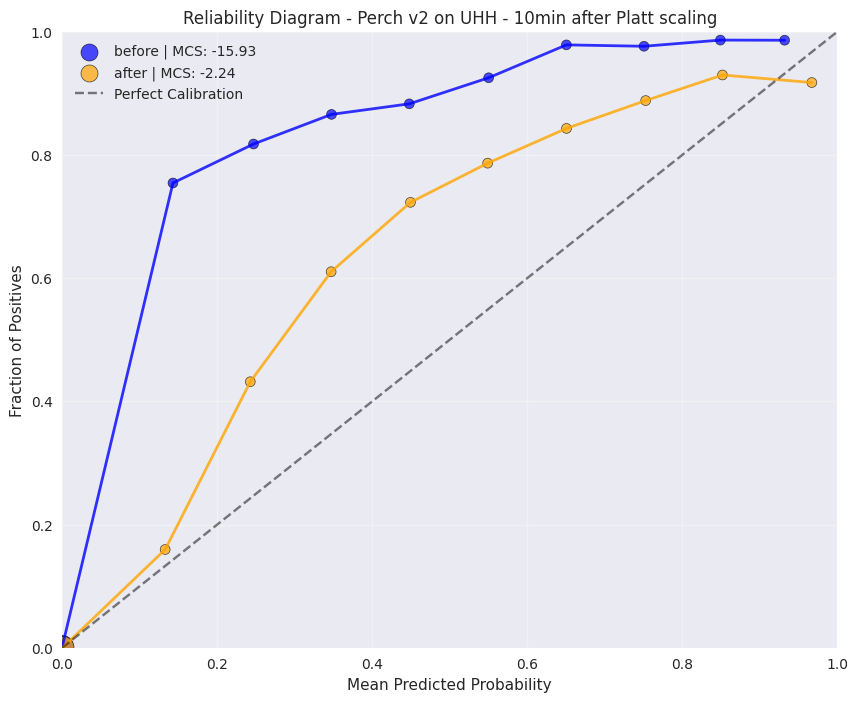

In [12]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after Platt scaling",
    )

## Parameters per class

### Temperature scaling

In [13]:
from uncertainbird.utils.temperature_scaling import fit_per_class_temperatures


for ds in valid_keys:

    print(f"Fit temperatures per class for {ds}")
    # compute global temperature value based on POW
    temperatures = fit_per_class_temperatures(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )


    data_120[ds+'_test']["predictions_ts"] = apply_temperature_scaling(
        data_120[ds+'_test']["logits"], temperatures, model= model
    )
    print('After temperature scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Fit temperatures per class for HSN
After temperature scaling:
Accuracy: tensor(0.9987)
cmAP: tensor(0.5078)
Precision: tensor(0.)
Recall: tensor(0.)
F1 Score: tensor(0.)
AUROC: tensor(0.0449)
ECE: tensor(0.0023)
ECE Weighted: tensor(0.0886)
ECE Top-3: tensor(0.0763)
ECE Top-5: tensor(0.0518)
ECE Top-10: tensor(0.0449)
ECE Top-21: tensor(0.0456)
Miscalibration Score (MCS): tensor(-0.0778)
ECE Under-confidence: tensor(0.0832)
ECE Over-confidence: tensor(0.0054)
Fit temperatures per class for NBP
After temperature scaling:
Accuracy: tensor(0.9959)
cmAP: tensor(0.6451)
Precision: tensor(0.)
Recall: tensor(0.)
F1 Score: tensor(0.)
AUROC: tensor(0.1169)
ECE: tensor(0.0021)
ECE Weighted: tensor(0.0227)
ECE Top-3: tensor(0.0428)
ECE Top-5: tensor(0.0411)
ECE Top-10: tensor(0.0376)
ECE Top-21: tensor(0.0303)
Miscalibration Score (MCS): tensor(-0.0215)
ECE Under-confidence: tensor(0.0221)
ECE Over-confidence: tensor(0.0006)
Fit temperatures per class for NES
After temperature scaling:


Accuracy: tensor(0.9988)
cmAP: tensor(0.3228)
Precision: tensor(0.0065)
Recall: tensor(0.0084)
F1 Score: tensor(0.0051)
AUROC: tensor(0.1739)
ECE: tensor(0.0021)
ECE Weighted: tensor(0.0219)
ECE Top-3: tensor(0.0474)
ECE Top-5: tensor(0.0314)
ECE Top-10: tensor(0.0178)
ECE Top-21: tensor(0.0101)
Miscalibration Score (MCS): tensor(-0.0172)
ECE Under-confidence: tensor(0.0195)
ECE Over-confidence: tensor(0.0024)
Fit temperatures per class for PER
After temperature scaling:
Accuracy: tensor(0.9941)
cmAP: tensor(0.2273)
Precision: tensor(0.)
Recall: tensor(0.)
F1 Score: tensor(0.)
AUROC: tensor(0.2493)
ECE: tensor(0.0055)
ECE Weighted: tensor(0.1093)
ECE Top-3: tensor(0.2217)
ECE Top-5: tensor(0.1719)
ECE Top-10: tensor(0.1141)
ECE Top-21: tensor(0.0738)
Miscalibration Score (MCS): tensor(-0.1089)
ECE Under-confidence: tensor(0.1091)
ECE Over-confidence: tensor(0.0002)
Fit temperatures per class for POW
After temperature scaling:
Accuracy: tensor(0.9931)
cmAP: tensor(0.5239)
Precision: ten

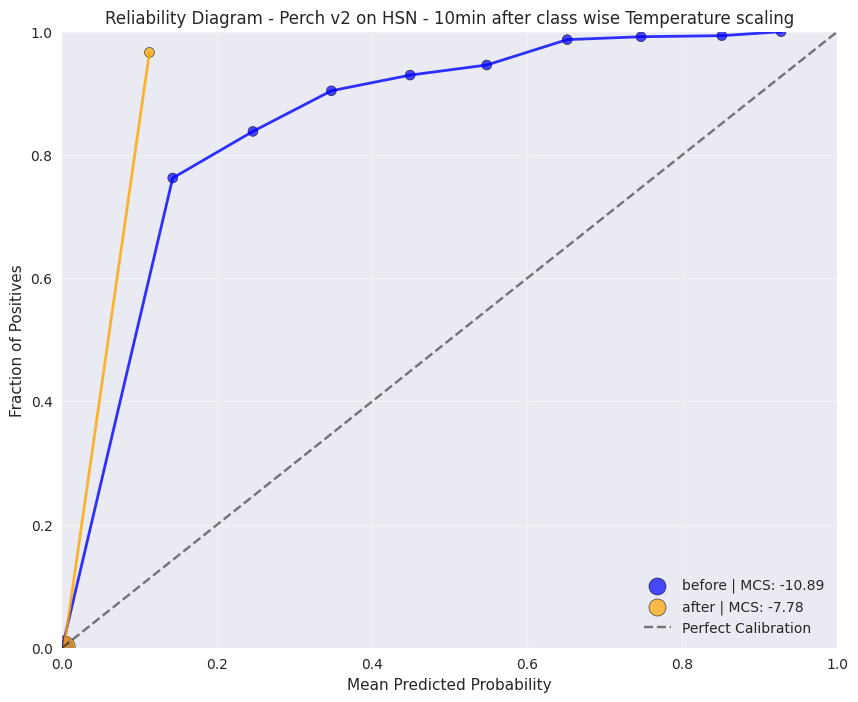

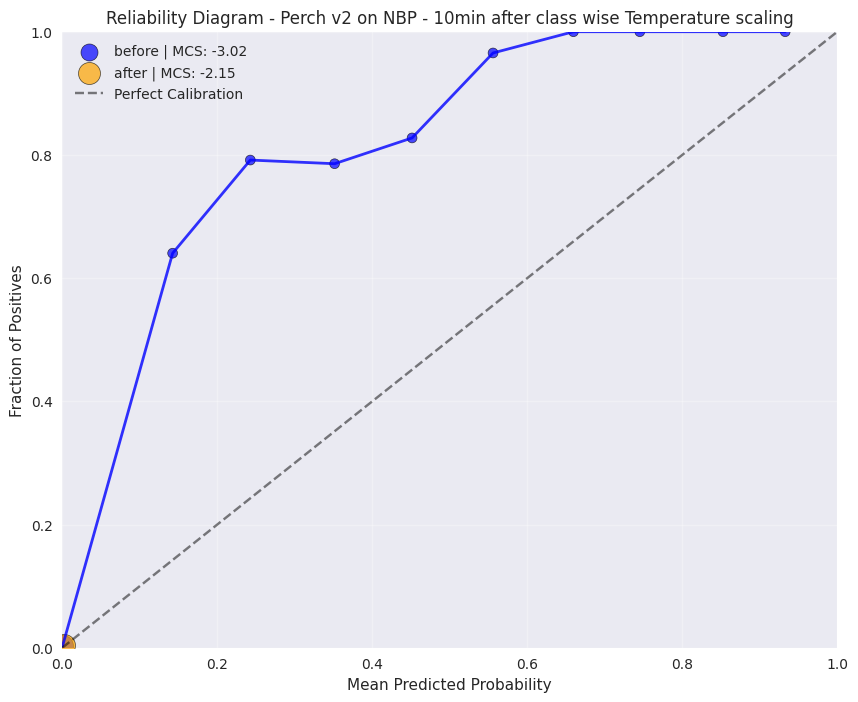

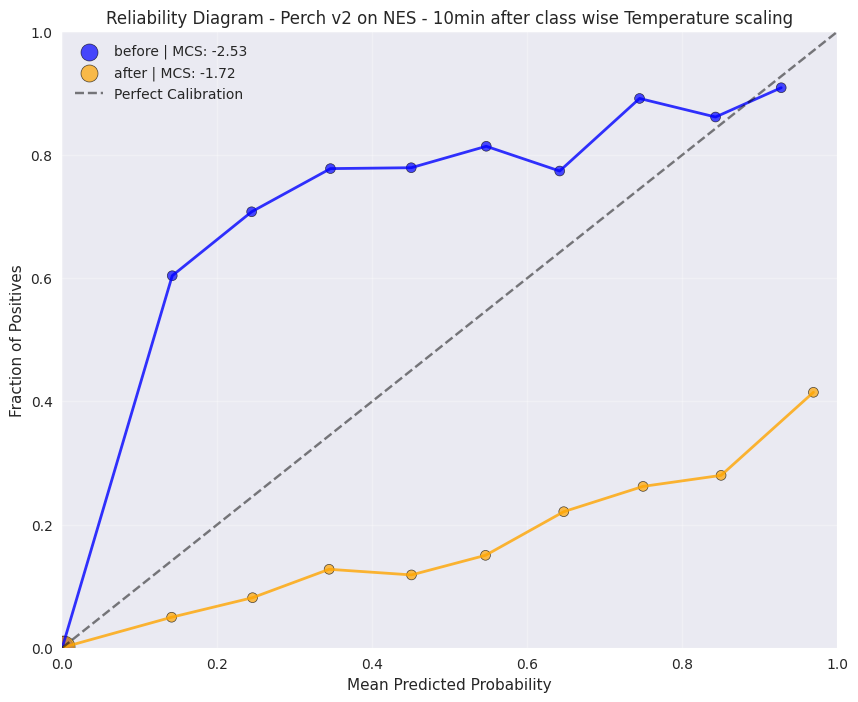

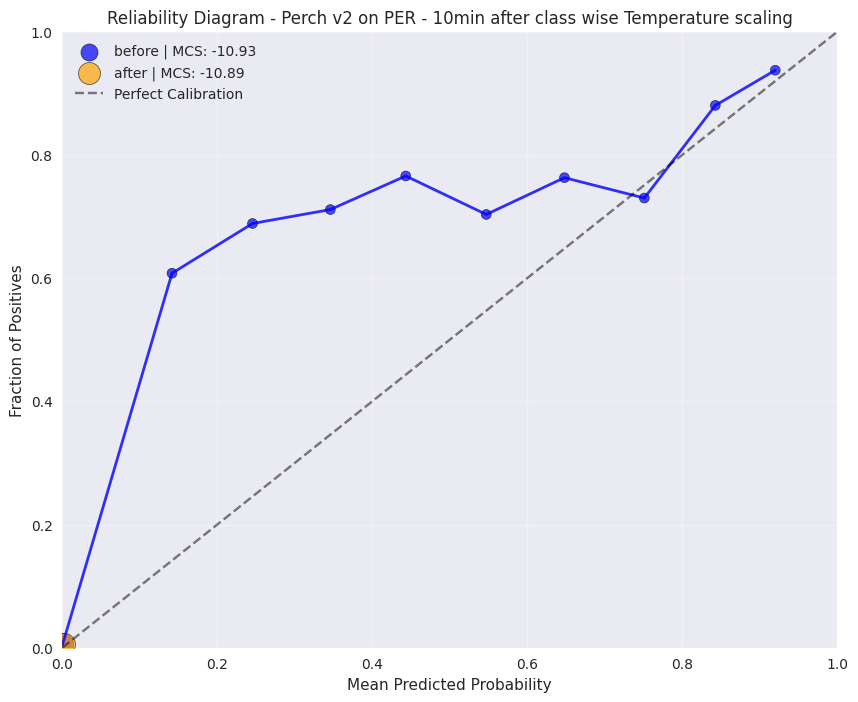

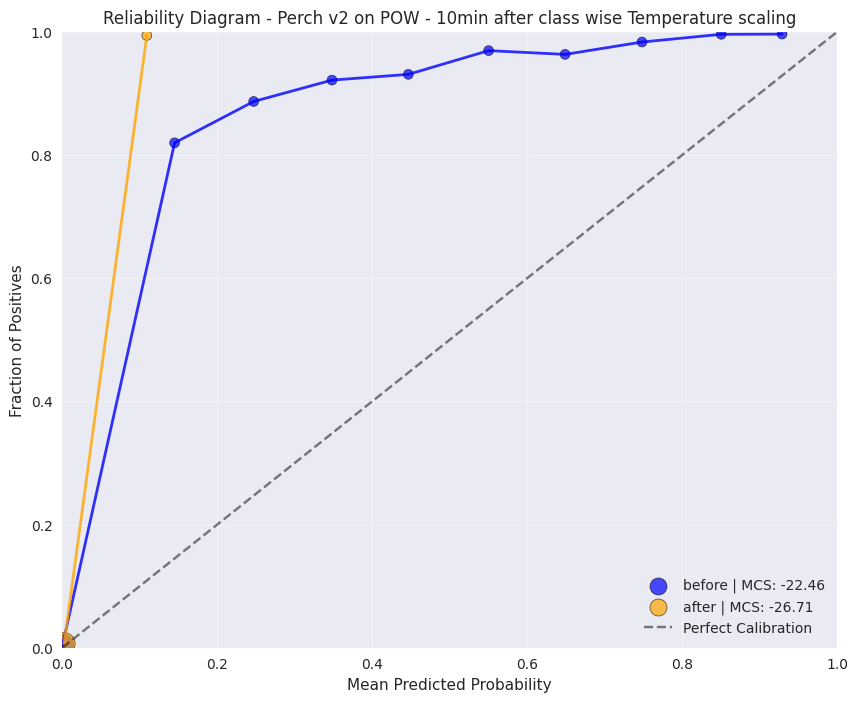

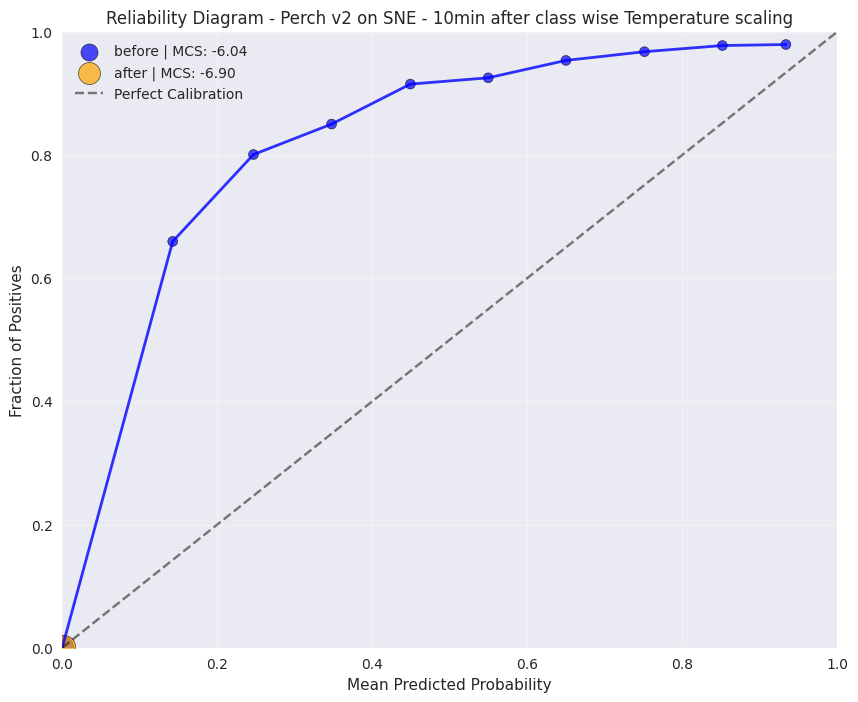

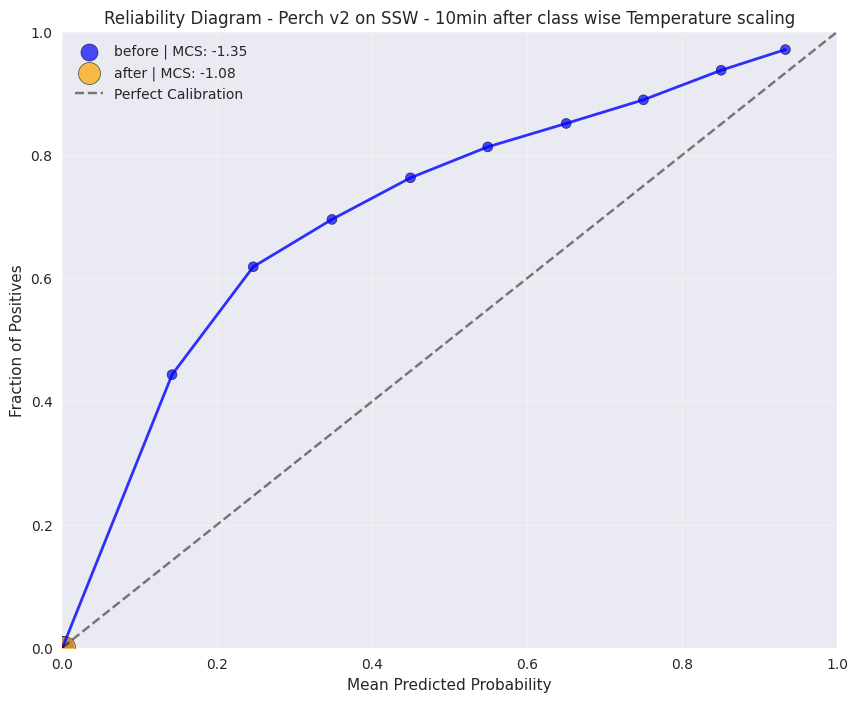

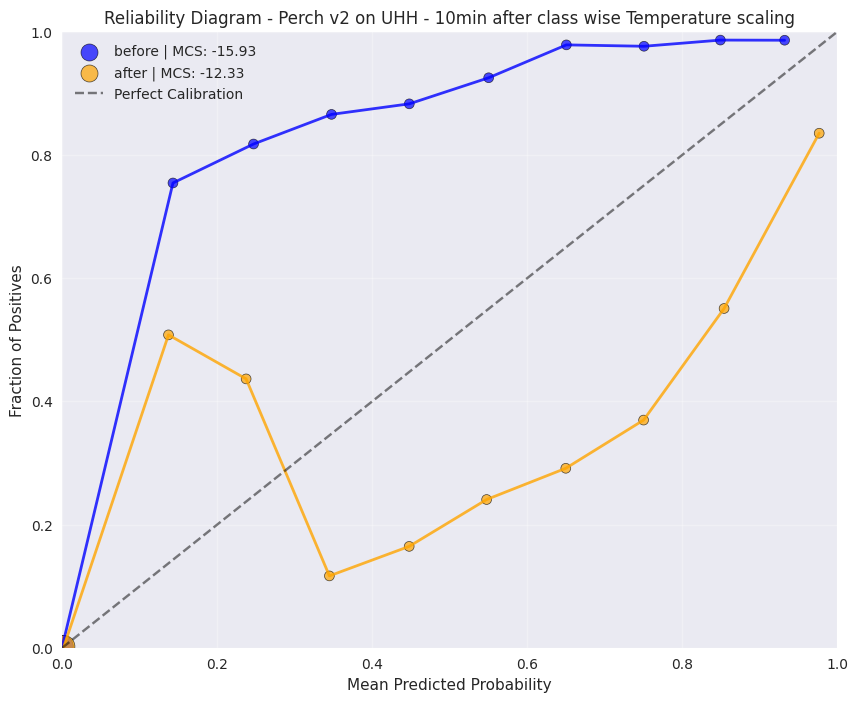

In [14]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after class wise Temperature scaling",
    )

### Platt scaling

In [15]:
from uncertainbird.utils.temperature_scaling import fit_per_class_platt_scaling, apply_platt_scaling
for ds in valid_keys:

    # compute global temperature value based on POW
    slopes, biases = fit_per_class_platt_scaling(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )

    # for i, (slope, bias) in enumerate(zip(slopes, biases)):
    #     print(f"Optimal slope: {slope:.3f}, bias: {bias:.3f} for {ds}, class {i}")

    data_120[ds+'_test']["predictions_ts"] = apply_platt_scaling(
        data_120[ds+'_test']["logits"], slopes, biases, model= model
    )
    print('After platt scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

After platt scaling:
Accuracy: tensor(0.9992)
cmAP: tensor(0.1708)
Precision: tensor(0.0080)
Recall: tensor(0.0057)
F1 Score: tensor(0.0066)
AUROC: tensor(0.0178)
ECE: tensor(0.0013)
ECE Weighted: tensor(0.0535)
ECE Top-3: tensor(0.0534)
ECE Top-5: tensor(0.0489)
ECE Top-10: tensor(0.0379)
ECE Top-21: tensor(0.0261)
Miscalibration Score (MCS): tensor(0.0424)
ECE Under-confidence: tensor(0.0055)
ECE Over-confidence: tensor(0.0480)
After platt scaling:
Accuracy: tensor(0.9959)
cmAP: tensor(0.2513)
Precision: tensor(0.0049)
Recall: tensor(0.0005)
F1 Score: tensor(0.0009)
AUROC: tensor(0.0497)
ECE: tensor(0.0022)
ECE Weighted: tensor(0.0232)
ECE Top-3: tensor(0.0443)
ECE Top-5: tensor(0.0390)
ECE Top-10: tensor(0.0359)
ECE Top-21: tensor(0.0295)
Miscalibration Score (MCS): tensor(-0.0188)
ECE Under-confidence: tensor(0.0210)
ECE Over-confidence: tensor(0.0022)
After platt scaling:
Accuracy: tensor(0.9989)
cmAP: tensor(0.0987)
Precision: tensor(0.0157)
Recall: tensor(0.0082)
F1 Score: tenso

After platt scaling:
Accuracy: tensor(0.9989)
cmAP: tensor(0.0096)
Precision: tensor(0.0021)
Recall: tensor(0.0006)
F1 Score: tensor(0.0010)
AUROC: tensor(0.0077)
ECE: tensor(0.0021)
ECE Weighted: tensor(0.0221)
ECE Top-3: tensor(0.0301)
ECE Top-5: tensor(0.0439)
ECE Top-10: tensor(0.0294)
ECE Top-21: tensor(0.0164)
Miscalibration Score (MCS): tensor(0.0007)
ECE Under-confidence: tensor(0.0107)
ECE Over-confidence: tensor(0.0114)
After platt scaling:
Accuracy: tensor(0.9983)
cmAP: tensor(0.2729)
Precision: tensor(0.0217)
Recall: tensor(0.0073)
F1 Score: tensor(0.0097)
AUROC: tensor(0.0375)
ECE: tensor(0.0010)
ECE Weighted: tensor(0.0374)
ECE Top-3: tensor(0.0504)
ECE Top-5: tensor(0.0393)
ECE Top-10: tensor(0.0278)
ECE Top-21: tensor(0.0172)
Miscalibration Score (MCS): tensor(-0.0224)
ECE Under-confidence: tensor(0.0299)
ECE Over-confidence: tensor(0.0075)


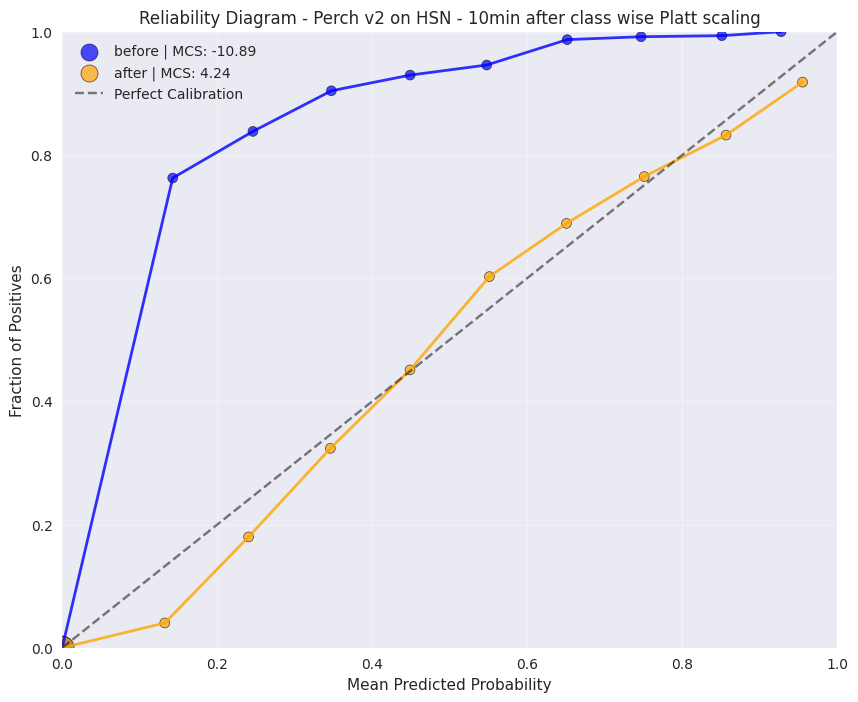

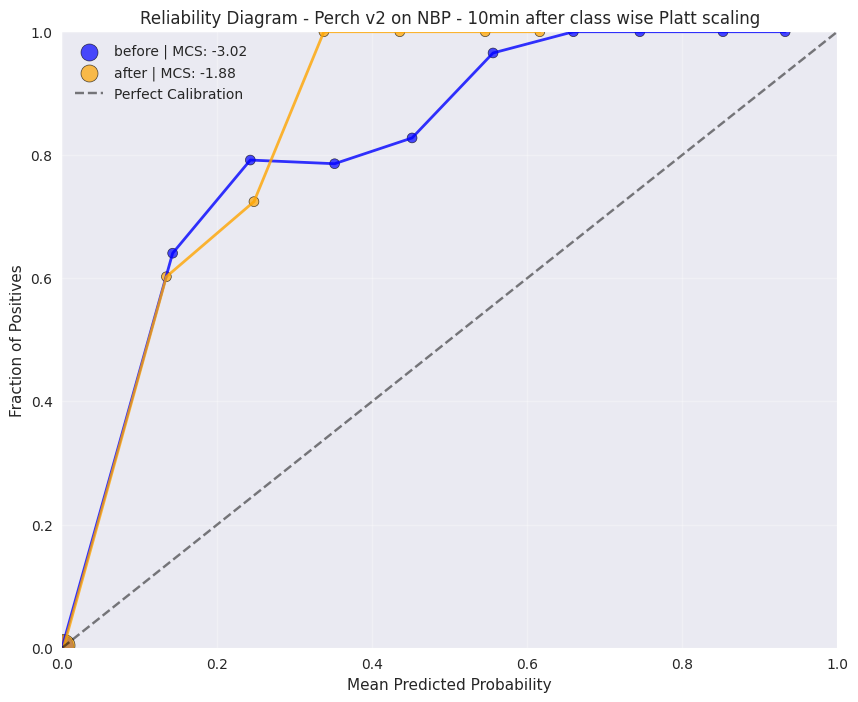

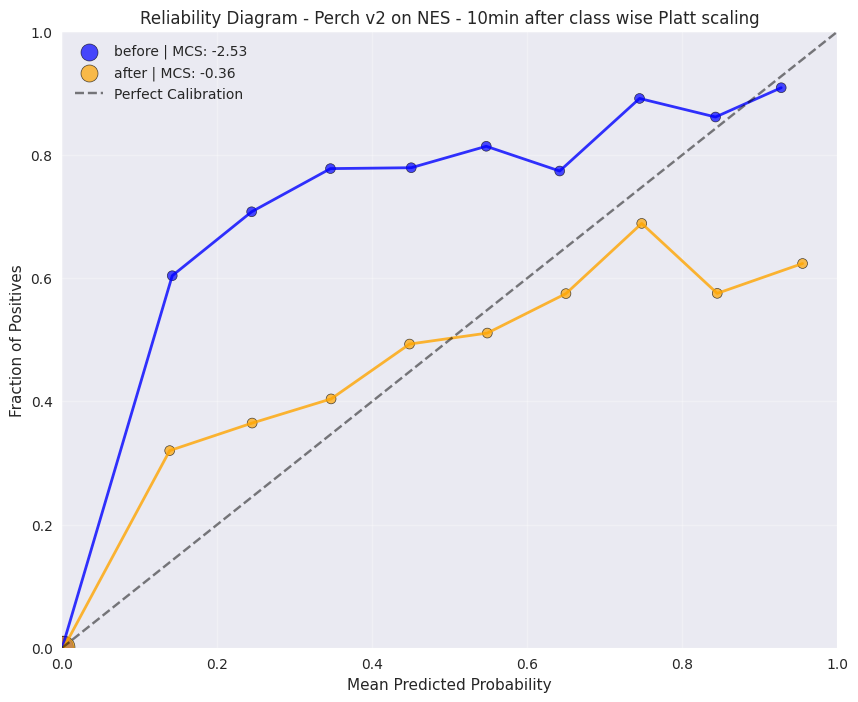

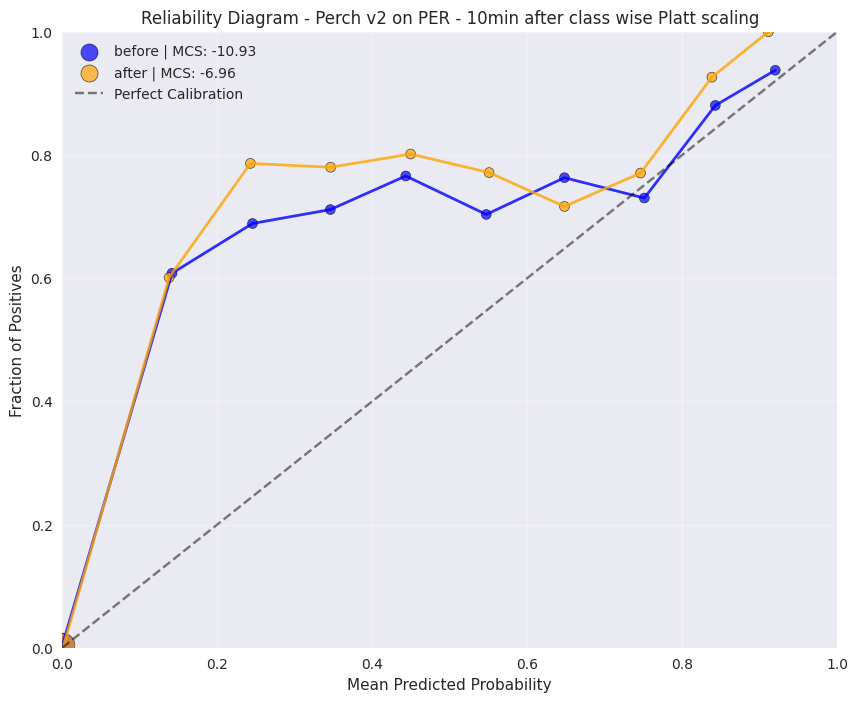

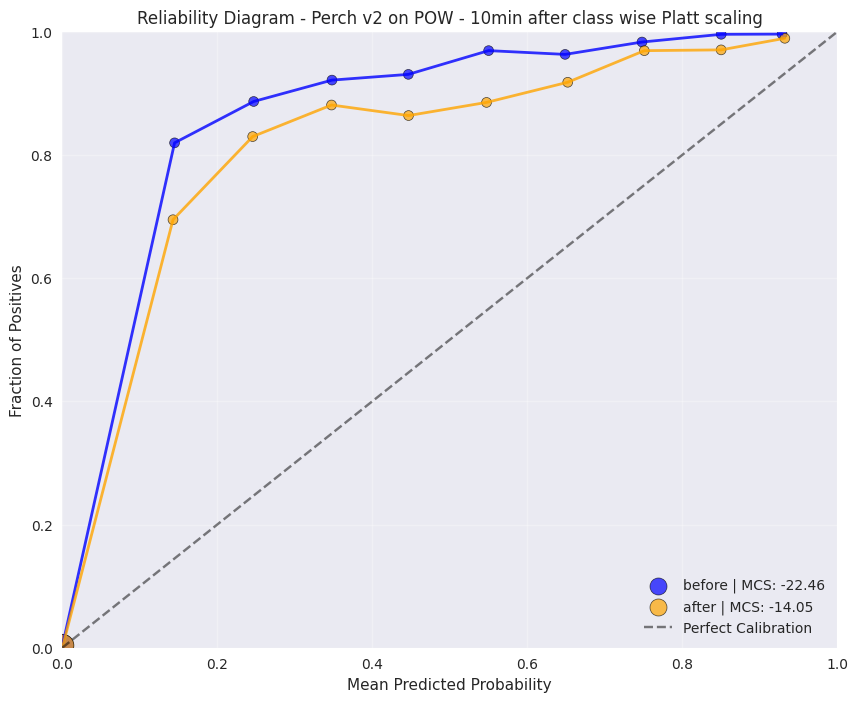

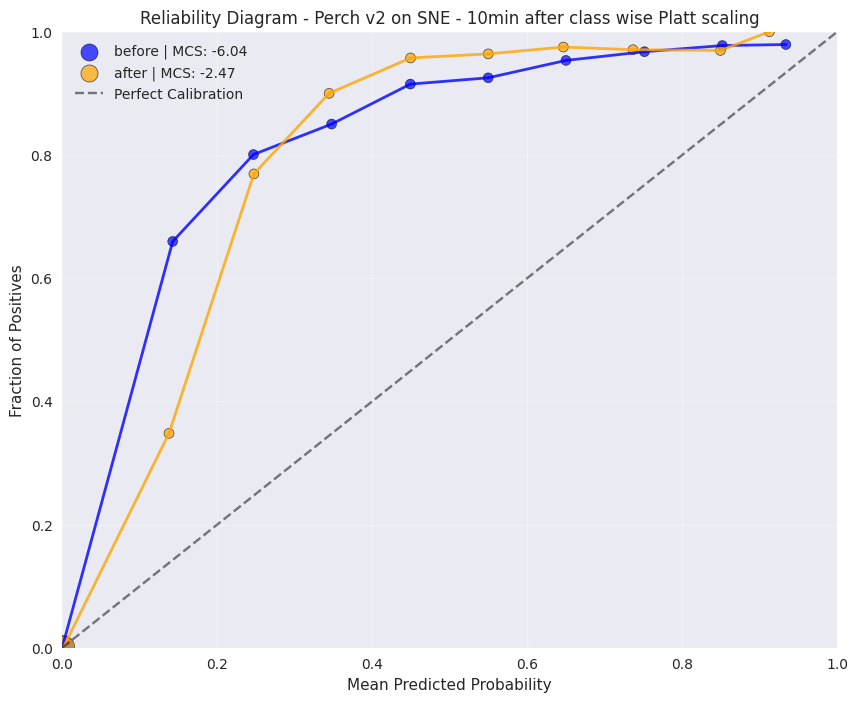

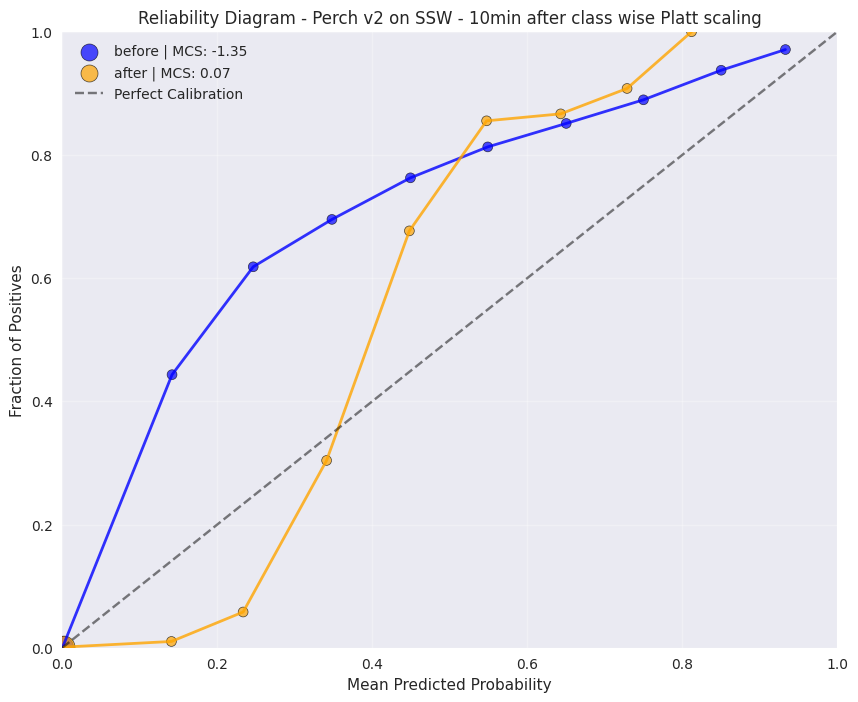

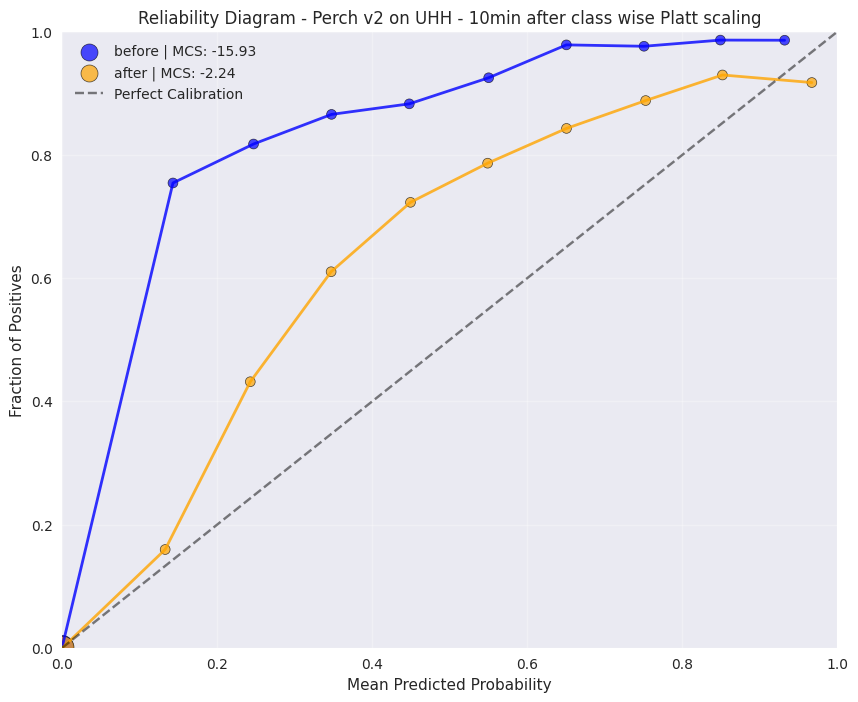

In [16]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after class wise Platt scaling",
    )